In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import datetime 
from dateutil.parser import parse
from sklearn.impute import SimpleImputer


# CORONA VIRUS ANALYSIS

In [4]:
data = pd.read_csv("C:\\Users\\Admin-pc\\Downloads\\covid_19_data.csv")
data.tail()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
10353,10354,03/30/2020,Wyoming,US,30-03-2020 22:58,94,0,0
10354,10355,03/30/2020,Xinjiang,Mainland China,30-03-2020 22:58,76,3,73
10355,10356,03/30/2020,Yukon,Canada,30-03-2020 22:58,4,0,0
10356,10357,03/30/2020,Yunnan,Mainland China,30-03-2020 22:58,180,2,172
10357,10358,03/30/2020,Zhejiang,Mainland China,30-03-2020 22:58,1255,1,1225


In [5]:
data.info()

adjusted_unique_dates = list(data['Last Update'].unique())
adjusted_unique_dates.sort()
adjusted_unique_dates

data.drop_duplicates(inplace=True)

data.replace('China', 'Mainland China', inplace=True)

data[data.Country == 'Mainland China']

excess_dates = []
for i in range(len(adjusted_unique_dates)):
    # assume the number of coronavirus cases, deaths, and recover increases over time 
    if i != 0:
        current_day_cases = data[data['Last Update']==adjusted_unique_dates[i]].Confirmed.sum()
        prev_day_cases = data[data['Last Update']==adjusted_unique_dates[i-1]].Confirmed.sum()
        current_day_deaths = data[data['Last Update']==adjusted_unique_dates[i]].Deaths.sum()
        prev_day_deaths = data[data['Last Update']==adjusted_unique_dates[i-1]].Deaths.sum()
        current_day_recovered = data[data['Last Update']==adjusted_unique_dates[i]].Recovered.sum()
        prev_day_recovered = data[data['Last Update']==adjusted_unique_dates[i-1]].Recovered.sum()
        
        if(current_day_cases < prev_day_cases or current_day_deaths < prev_day_deaths or current_day_recovered < prev_day_recovered):
            excess_dates.append(adjusted_unique_dates[i])
            # swap the current date with the previous date, it will get removed later
            temp = adjusted_unique_dates[i]
            adjusted_unique_dates[i] = adjusted_unique_dates[i-1]
            adjusted_unique_dates[i-1] = temp
            
for i in excess_dates:
    adjusted_unique_dates.remove(i)

world_cases = []
deaths = [] 
mortality_rate = []
recovered = [] 

for i in adjusted_unique_dates:
    confirmed_sum = data[data['Last Update']==i].Confirmed.sum()
    death_sum = data[data['Last Update']==i].Deaths.sum()
    recovered_sum = data[data['Last Update']==i].Recovered.sum()
    world_cases.append(confirmed_sum)
    deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovered.append(recovered_sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 8 columns):
Sno               10358 non-null int64
Date              10358 non-null object
Province/State    5578 non-null object
Country           10358 non-null object
Last Update       10358 non-null object
Confirmed         10358 non-null int64
Deaths            10358 non-null int64
Recovered         10358 non-null int64
dtypes: int64(4), object(4)
memory usage: 647.5+ KB


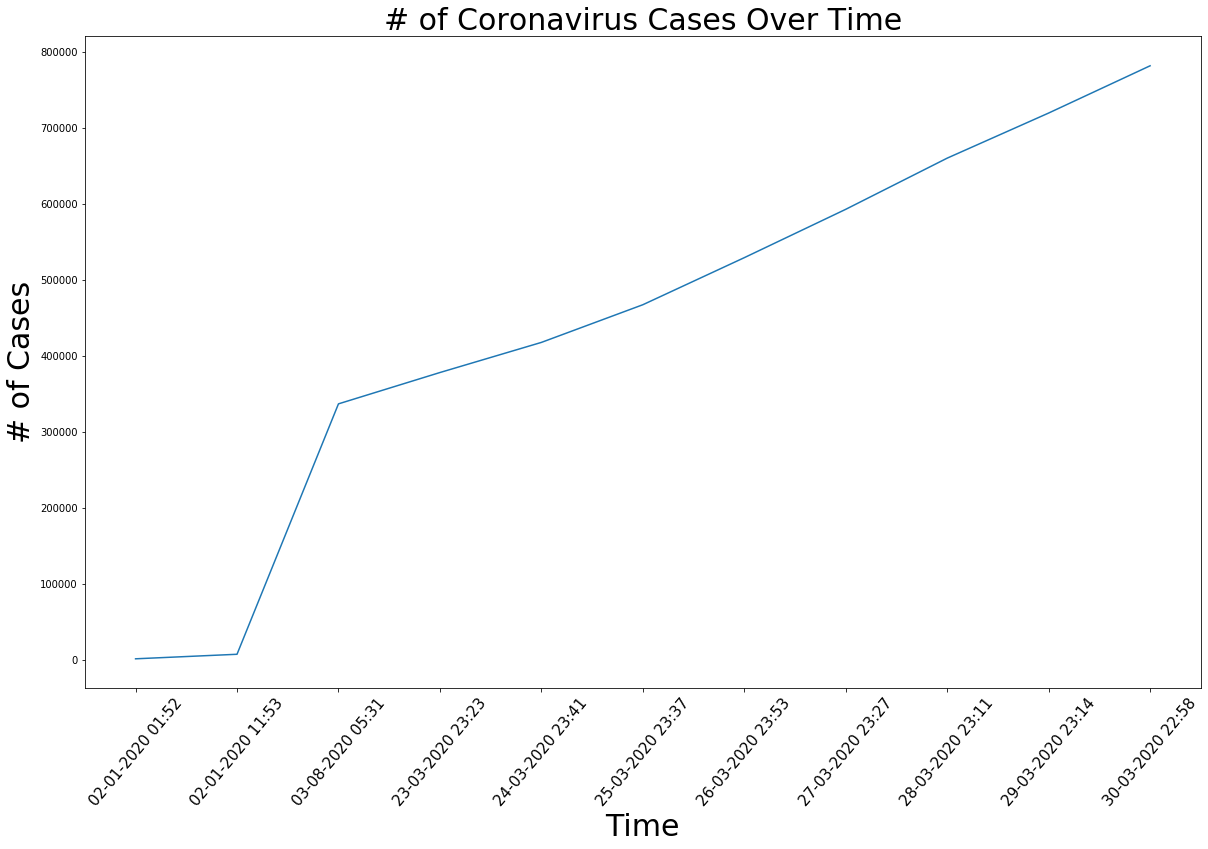

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_unique_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

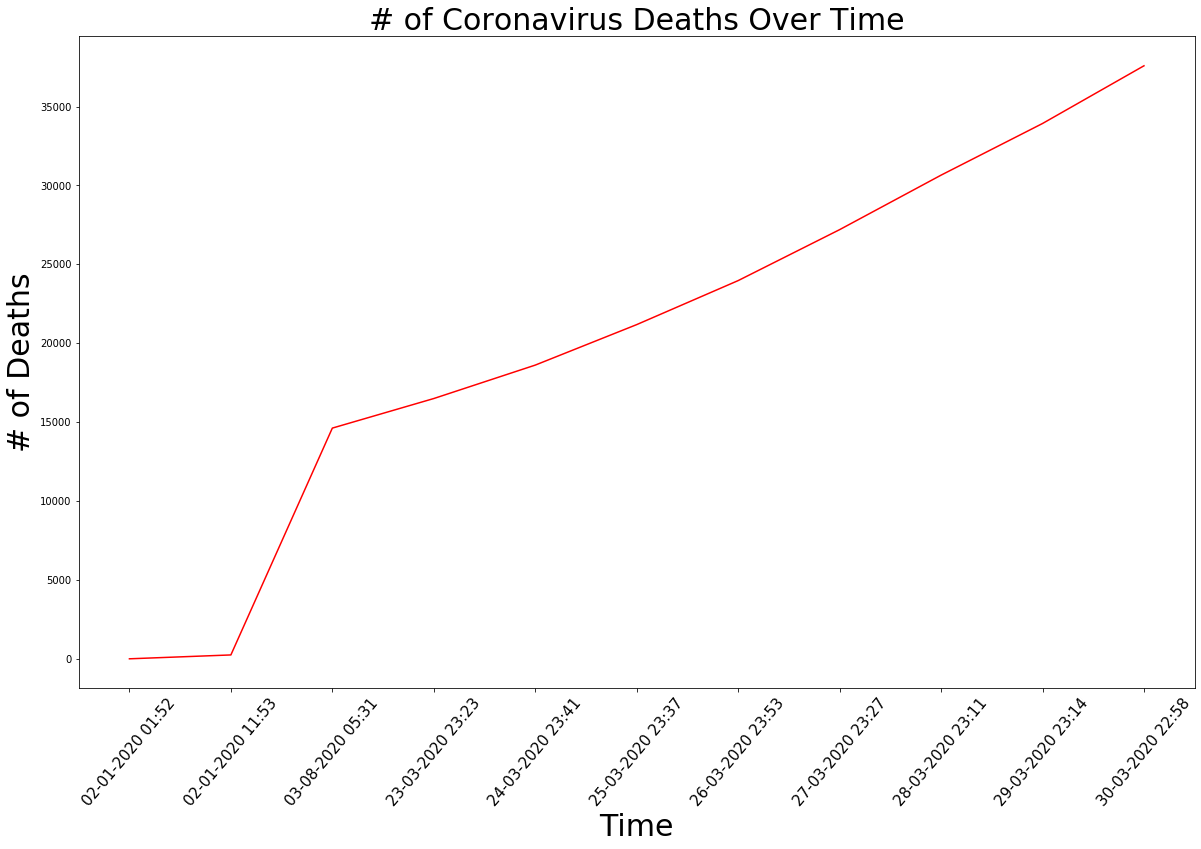

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_unique_dates, deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

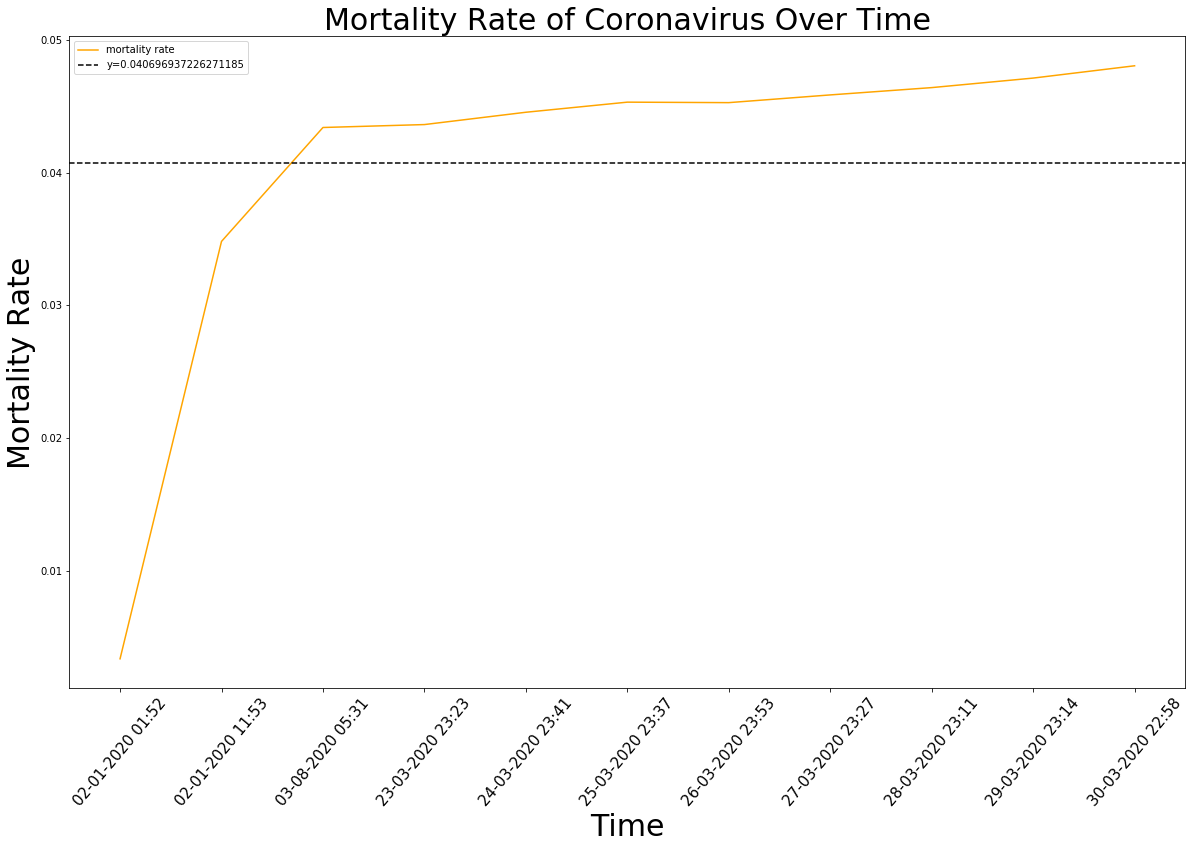

In [8]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_unique_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()


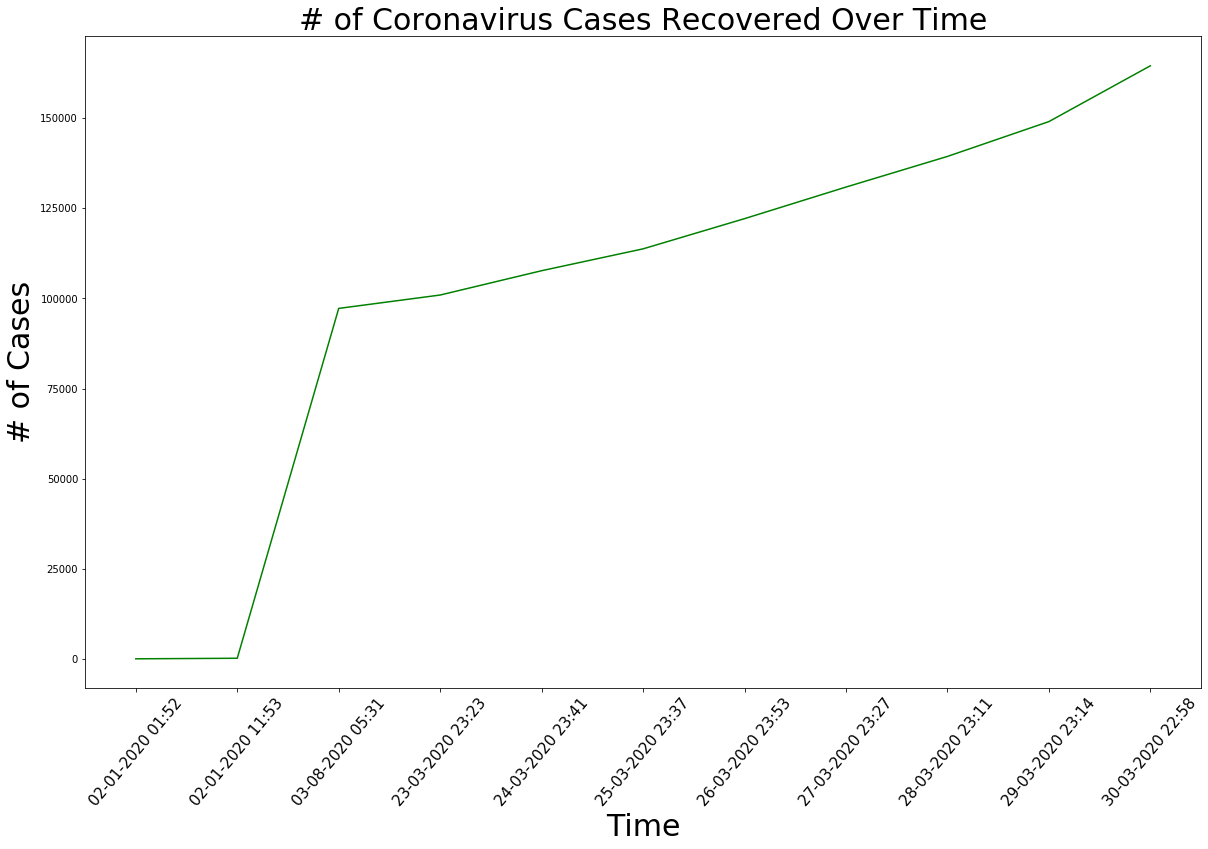

In [9]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_unique_dates, recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

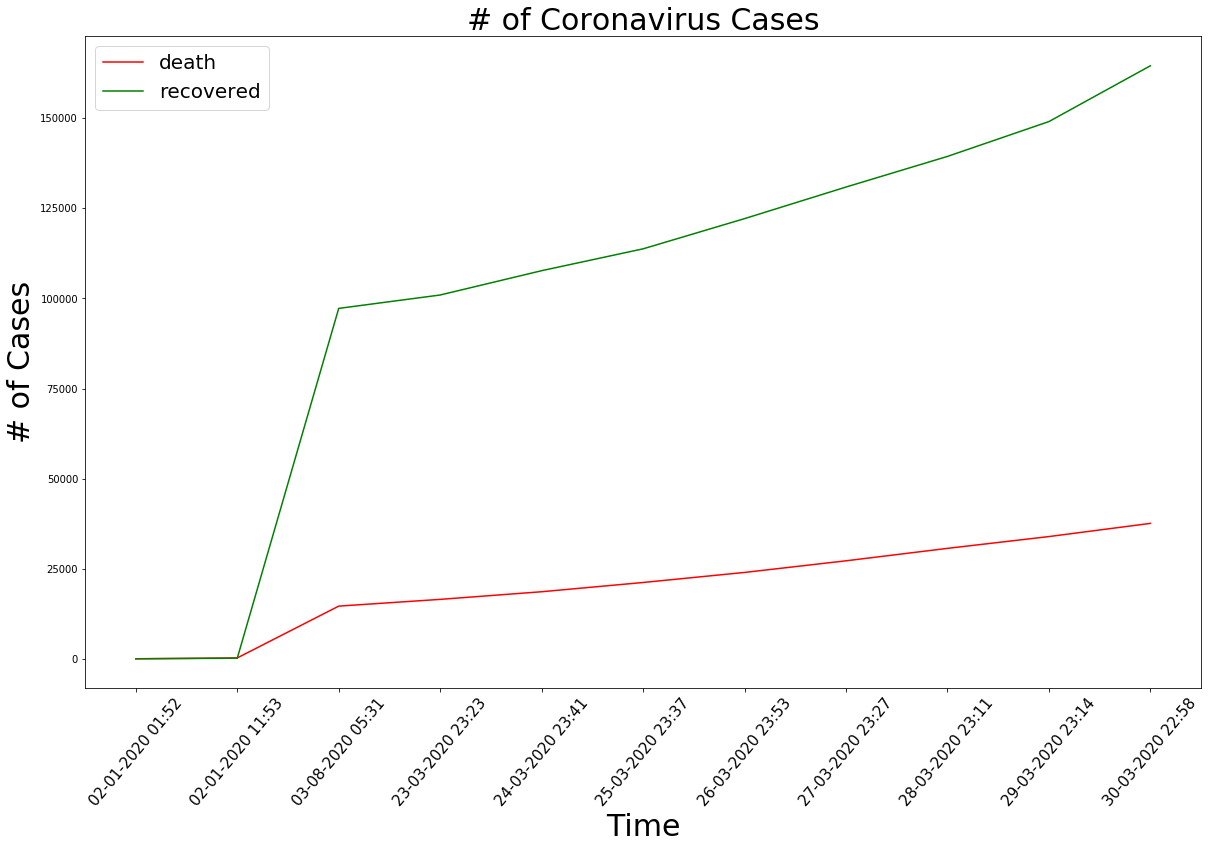

In [10]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_unique_dates, deaths, color='red')
plt.plot(adjusted_unique_dates, recovered, color='green')
plt.legend(['death', 'recovered'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

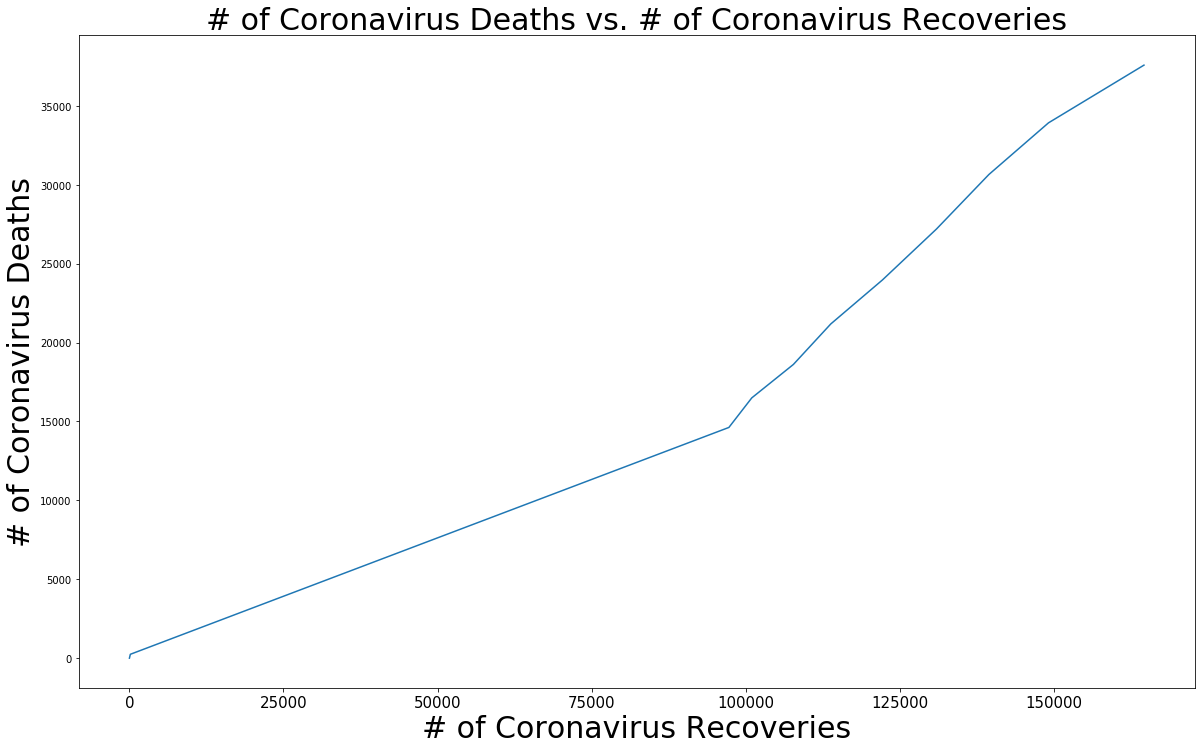

In [11]:
plt.figure(figsize=(20, 12))
plt.plot(recovered, deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [13]:
unique_provinces =  data['Province/State'][data.Confirmed > 0].unique()
unique_provinces

province_confirmed_cases = []
for i in unique_provinces:
    province_confirmed_cases.append(data[data.Confirmed>0][data['Province/State']==i].Confirmed.max())

nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

# number of cases per country/region
unique_countries = data[data.Confirmed>0]['Country'].unique()
unique_countries.sort()
unique_countries

# find unique dates
unique_dates = list(data['Last Update'].unique())
unique_dates.sort()
unique_dates

country_confirmed_cases = []
latest_date = adjusted_unique_dates[-1]
for i in unique_countries:   
    if i == 'Mainland China':
        country_confirmed_cases.append(data[data['Country']==i][data['Last Update']==latest_date].Confirmed.sum()) 
    else:
        index = -1
        while(True):
            if(len(data[data['Country']==i][data['Last Update']==unique_dates[index]])>0):
                country_confirmed_cases.append(data[data['Country']==i][data['Last Update']==unique_dates[index]].Confirmed.sum()) 
                break
            else:
                index -= 1

# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')



C:\Users\Admin-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Admin-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Admin-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Admin-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


 Azerbaijan: 1 cases
('St. Martin',): 2 cases
Afghanistan: 170 cases
Albania: 223 cases
Algeria: 584 cases
Andorra: 370 cases
Angola: 7 cases
Antigua and Barbuda: 7 cases
Argentina: 820 cases
Armenia: 482 cases
Aruba: 8 cases
Australia: 4361 cases
Austria: 9618 cases
Azerbaijan: 273 cases
Bahamas: 14 cases
Bahamas, The: 4 cases
Bahrain: 515 cases
Bangladesh: 49 cases
Barbados: 33 cases
Belarus: 152 cases
Belgium: 11899 cases
Belize: 3 cases
Benin: 6 cases
Bhutan: 4 cases
Bolivia: 97 cases
Bosnia and Herzegovina: 368 cases
Botswana: 3 cases
Brazil: 4579 cases
Brunei: 127 cases
Bulgaria: 359 cases
Burkina Faso: 246 cases
Burma: 14 cases
Cabo Verde: 6 cases
Cambodia: 107 cases
Cameroon: 139 cases
Canada: 7398 cases
Cape Verde: 1 cases
Cayman Islands: 2 cases
Central African Republic: 3 cases
Chad: 5 cases
Channel Islands: 1 cases
Chile: 2449 cases
Colombia: 798 cases
Congo (Brazzaville): 19 cases
Congo (Kinshasa): 81 cases
Costa Rica: 330 cases
Croatia: 790 cases
Cuba: 170 cases
Curacao: 

In [14]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')


Anhui: 990 cases
Beijing: 577 cases
Chongqing: 579 cases
Fujian: 340 cases
Guangdong: 1484 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 168 cases
Hebei: 321 cases
Henan: 1276 cases
Hubei: 67801 cases
Hunan: 1018 cases
Jiangsu: 645 cases
Jiangxi: 937 cases
Liaoning: 136 cases
Macau: 38 cases
Ningxia: 75 cases
Shandong: 773 cases
Shanghai: 498 cases
Shanxi: 136 cases
Sichuan: 550 cases
Taiwan: 47 cases
Tianjin: 174 cases
Washington: 4923 cases
Yunnan: 180 cases
Zhejiang: 1255 cases
Gansu: 138 cases
Heilongjiang: 484 cases
Hong Kong: 682 cases
Jilin: 98 cases
Shaanxi: 253 cases
Xinjiang: 76 cases
Inner Mongolia: 97 cases
Chicago: 1 cases
Qinghai: 18 cases
Illinois: 5056 cases
California: 7138 cases
Arizona: 1157 cases
Ontario: 1706 cases
New South Wales: 2032 cases
Victoria: 821 cases
British Columbia: 970 cases
Bavaria: 5 cases
Tibet: 1 cases
Queensland: 689 cases
Chicago, IL: 3 cases
South Australia: 305 cases
Boston, MA: 1 cases
Los Angeles, CA: 14 cases
Orange, CA: 1 cases
Sant

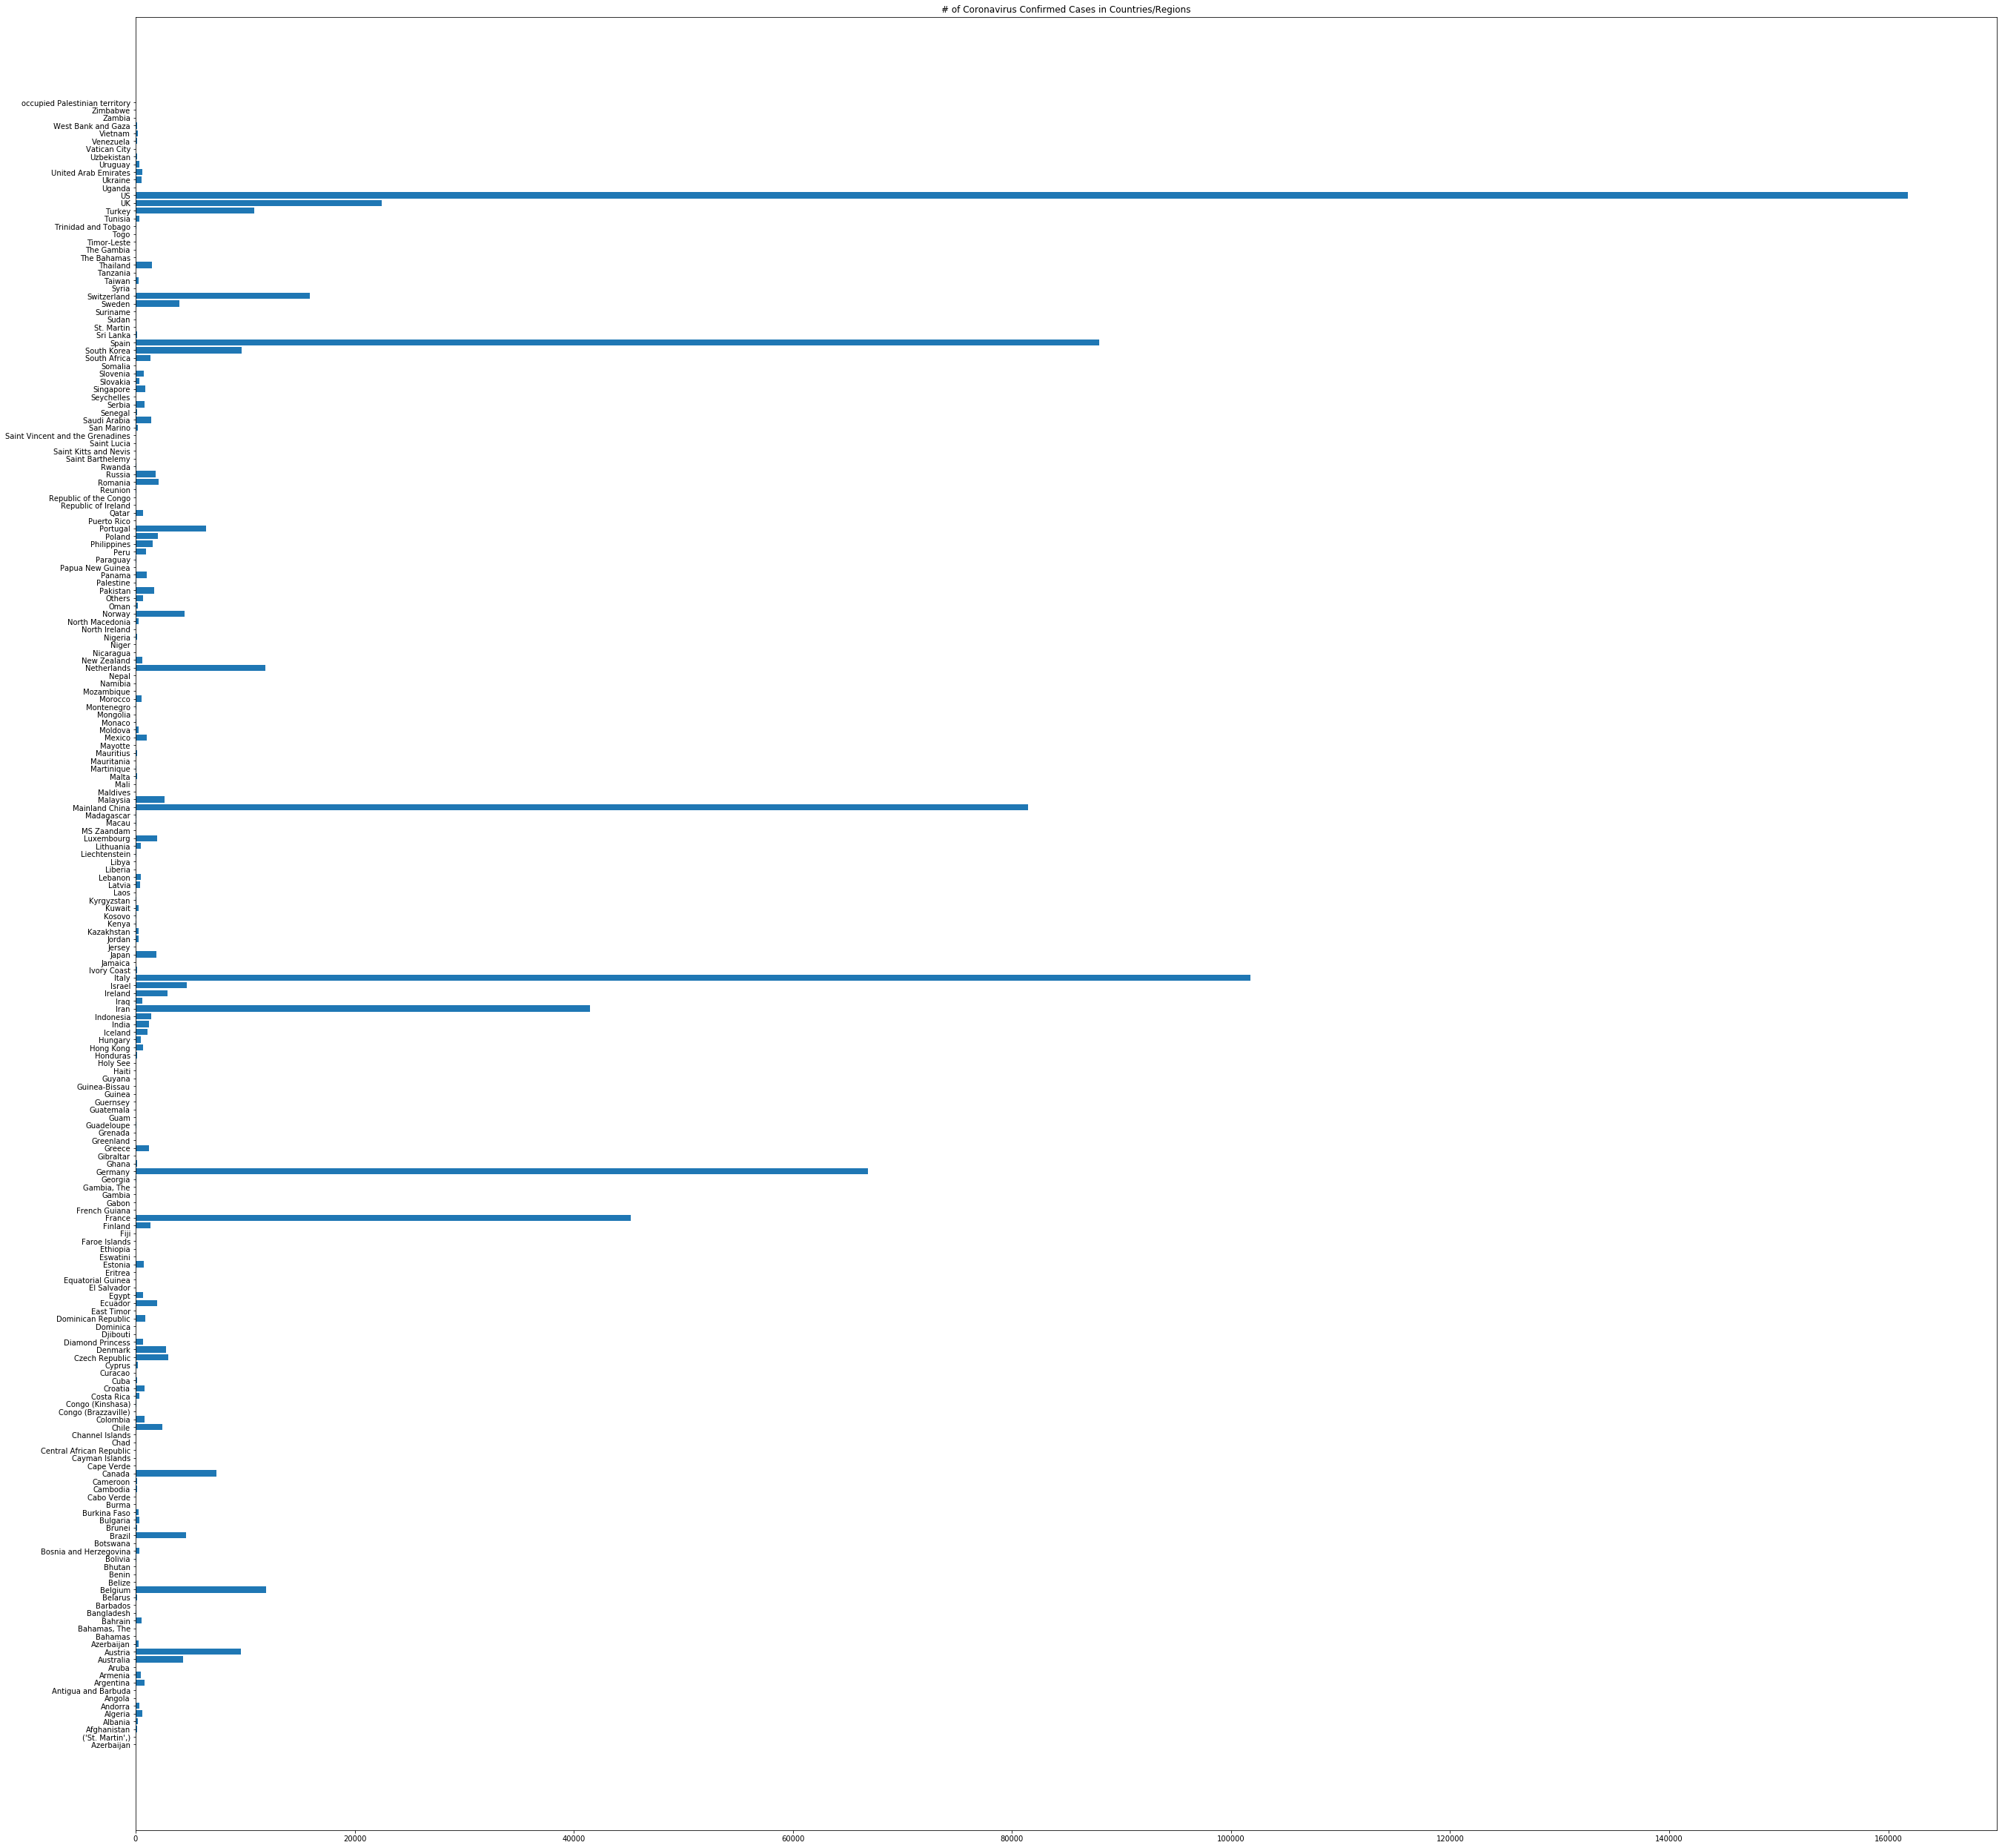

In [17]:
plt.figure(figsize=(45, 45))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('# of Coronavirus Confirmed Cases in Countries/Regions')
plt.show()

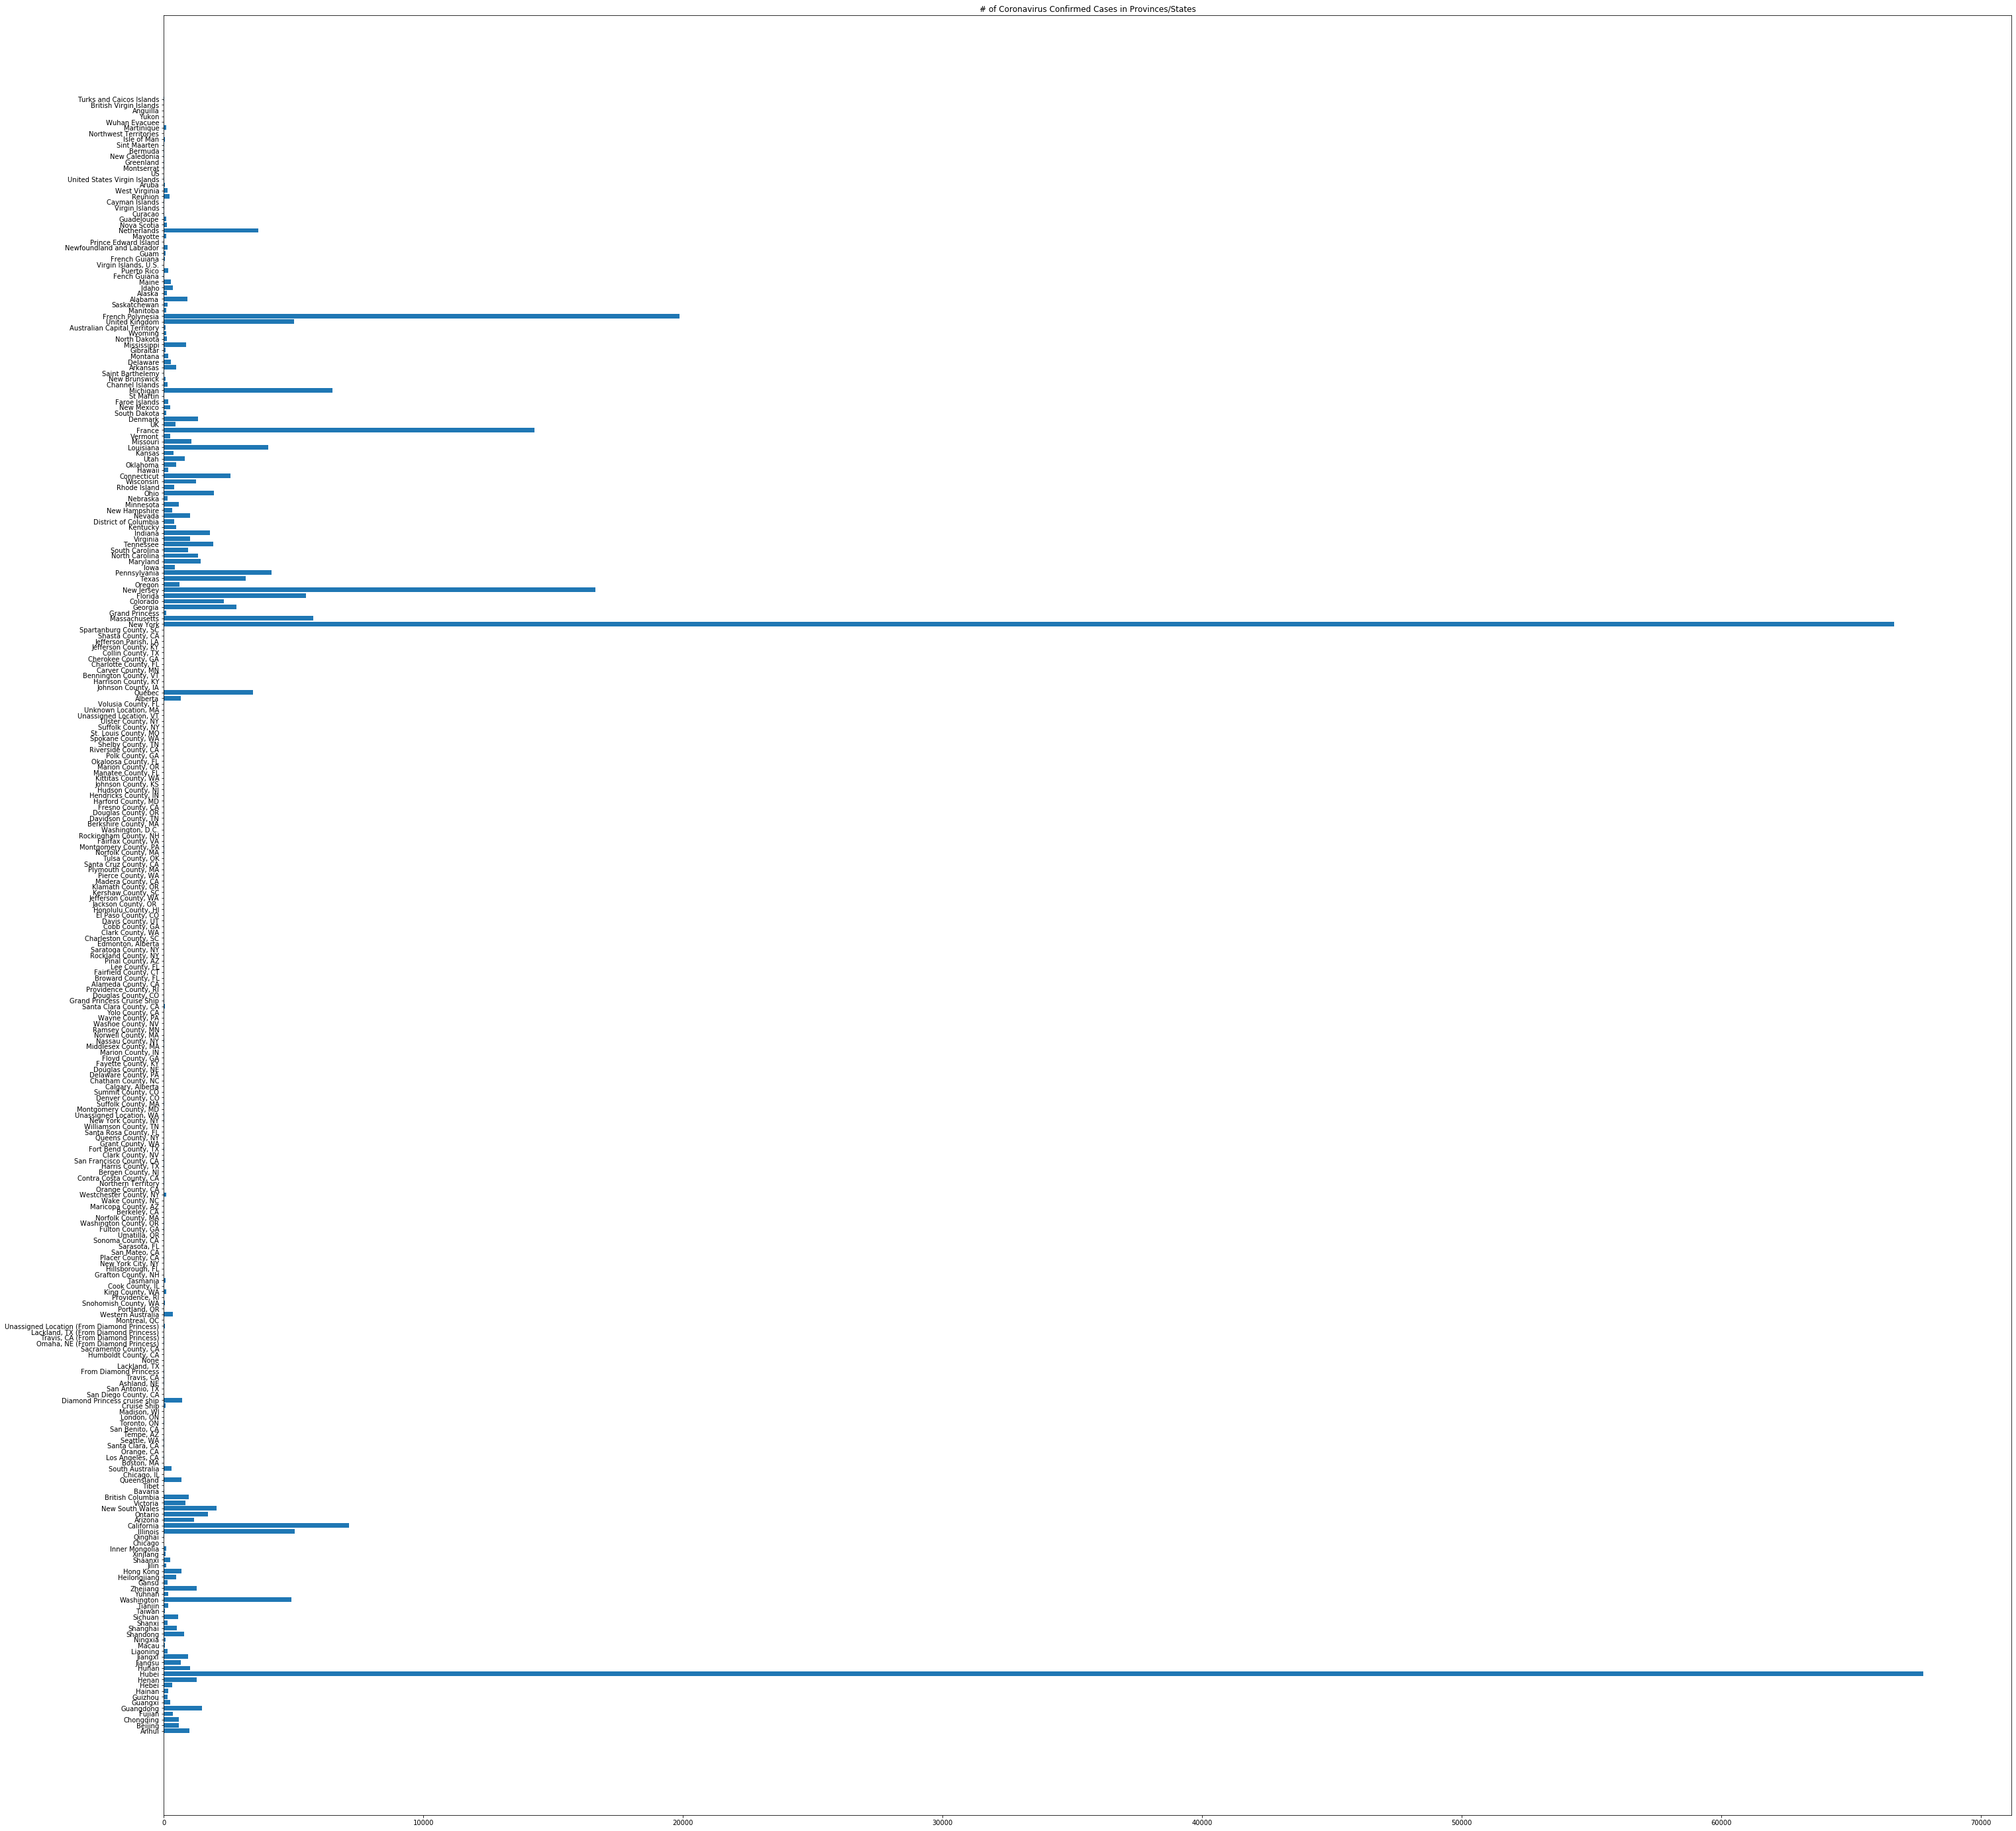

In [18]:
plt.figure(figsize=(50, 50))
plt.barh(unique_provinces, province_confirmed_cases)
plt.title('# of Coronavirus Confirmed Cases in Provinces/States')
plt.show()

# PIE CHART CONFIRMED CASES COUBTRYWISE AND PROVINCE WISE

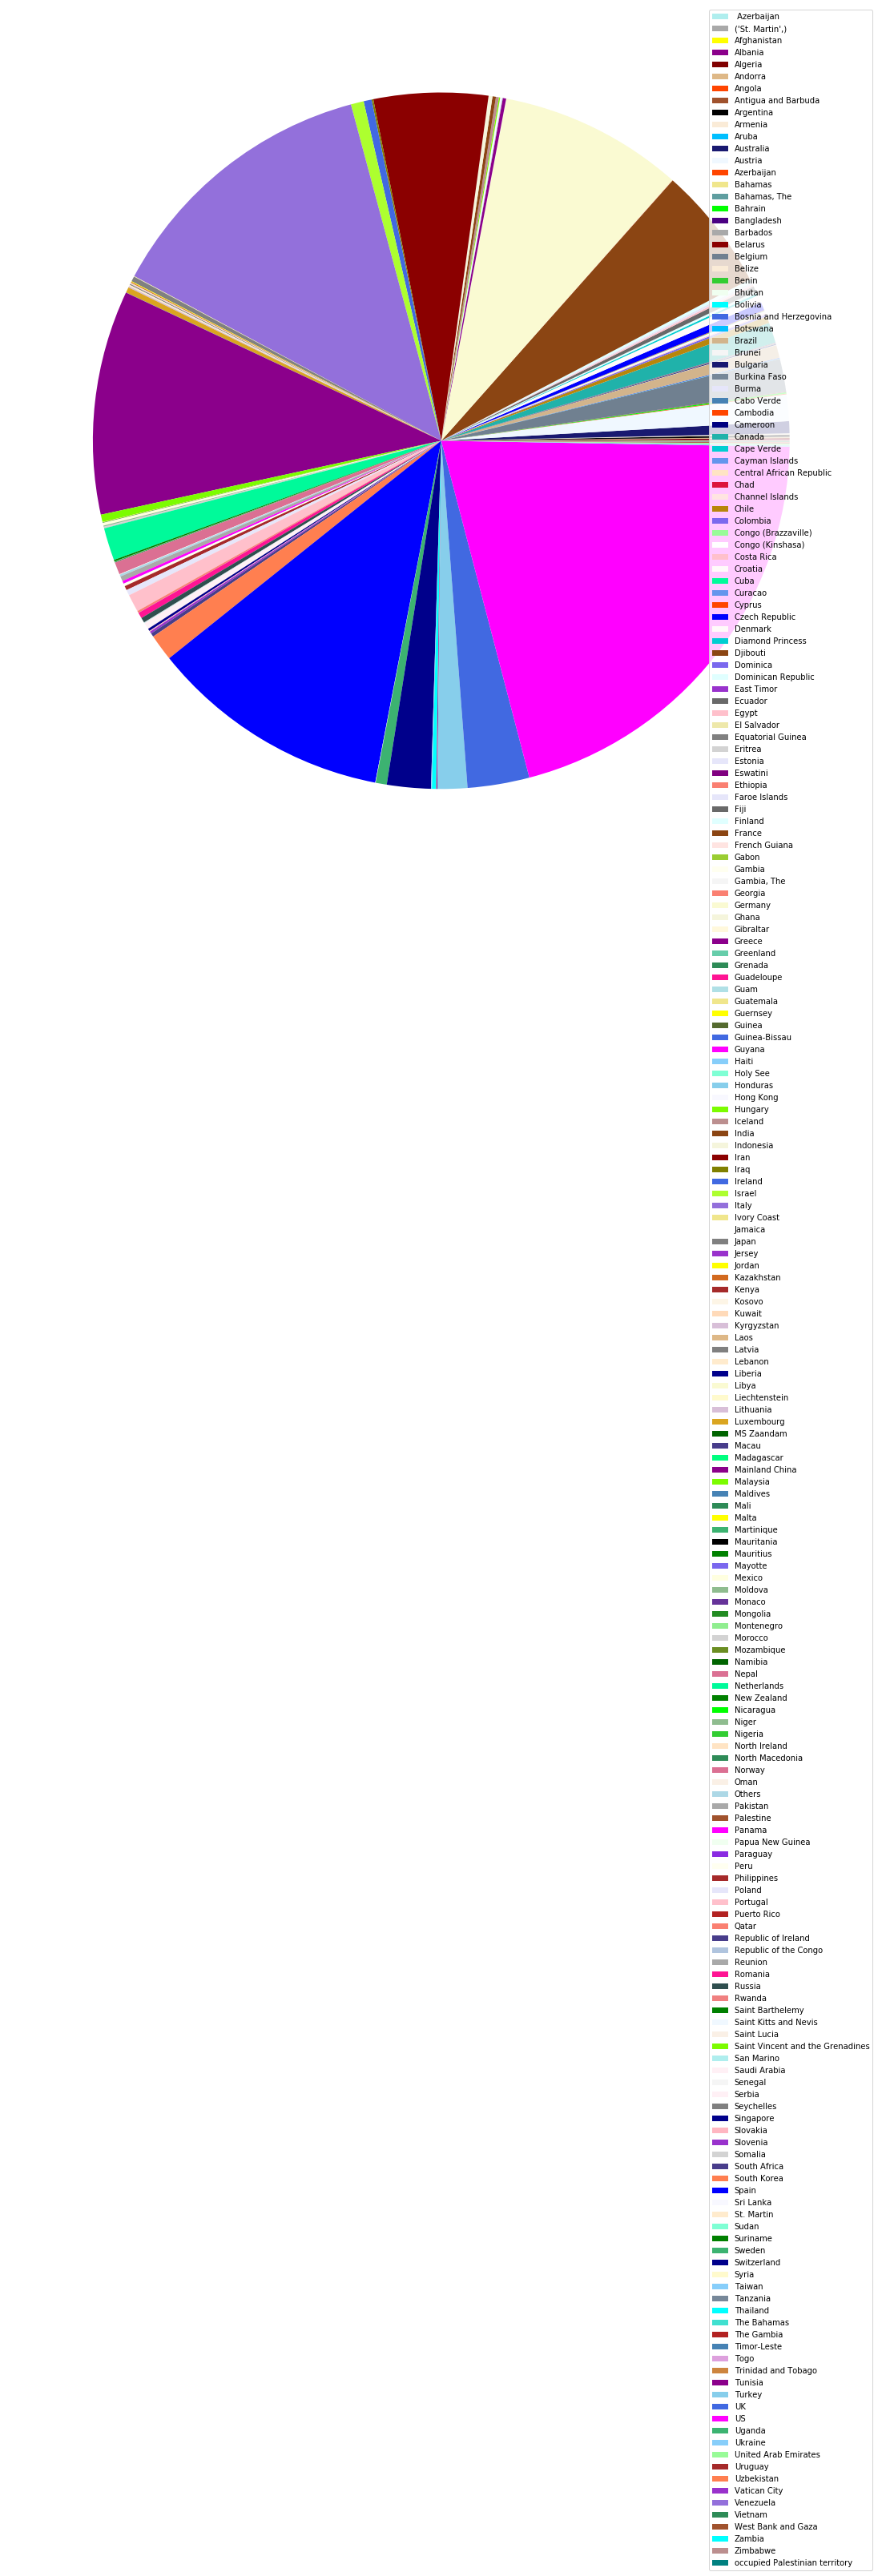

In [21]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(40,20))
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

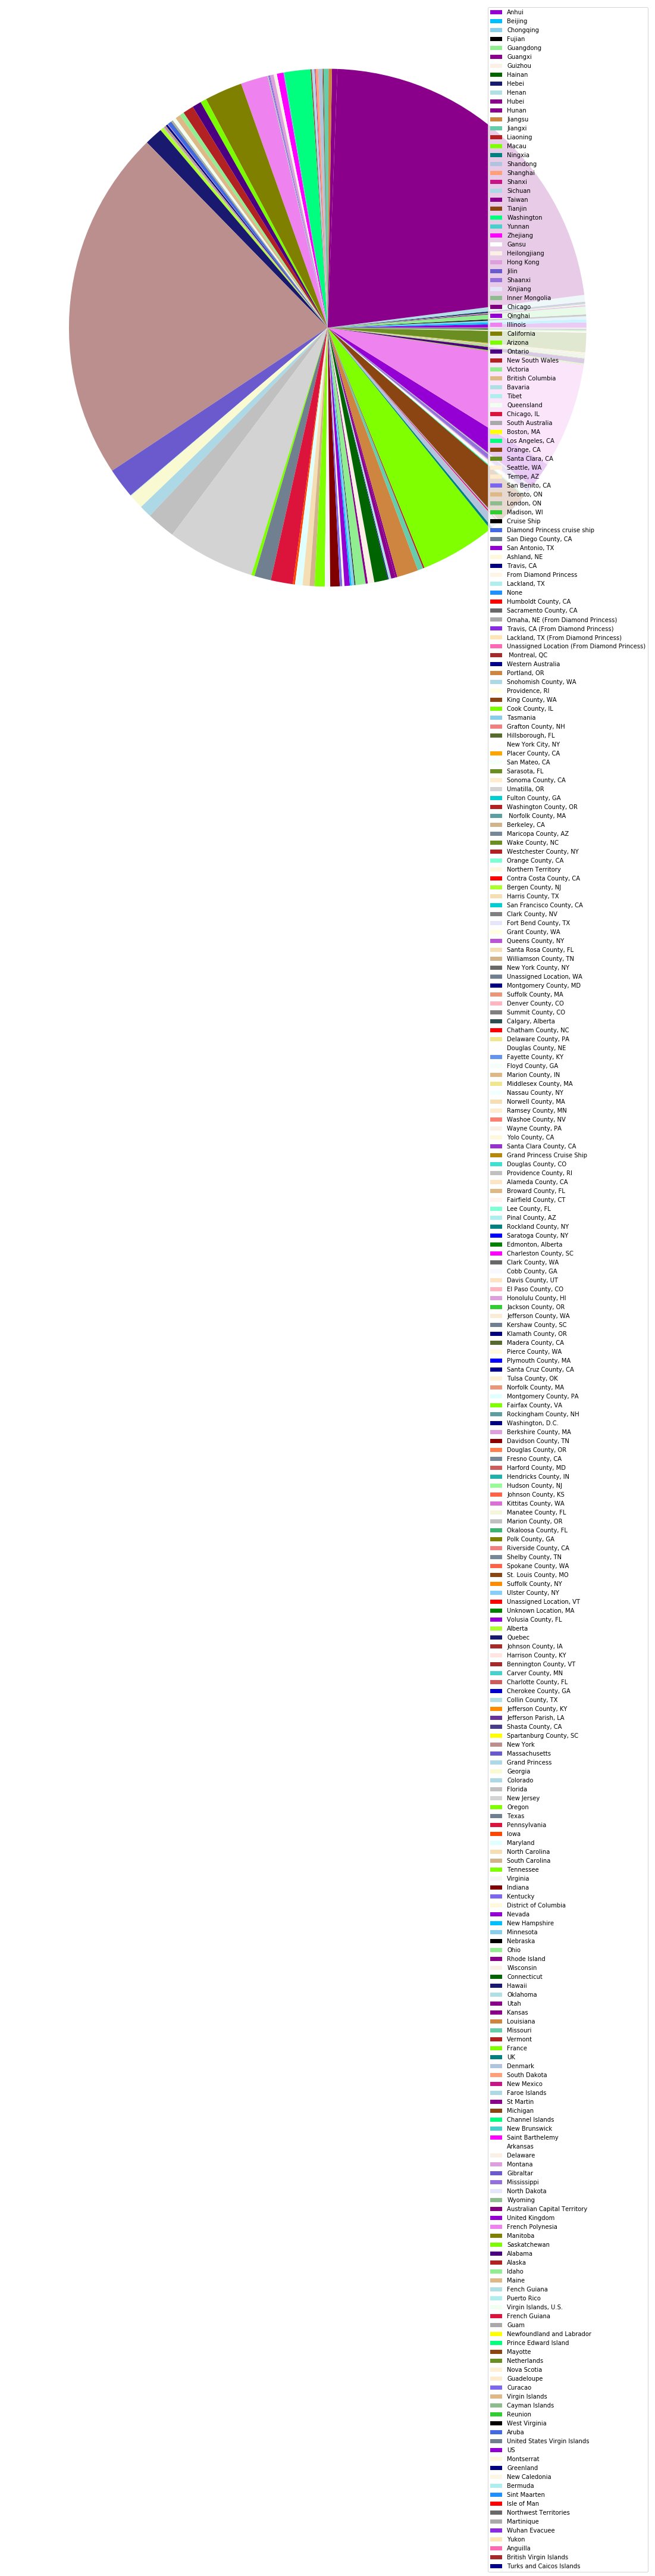

In [22]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(50,20))
plt.pie(province_confirmed_cases, colors=c)
plt.legend(unique_provinces, loc='best')
plt.show()

In [5]:
#Correlation between feature over the time
covid= pd.read_csv("C:\\Users\\Admin-pc\\Downloads\\covid_19_data.csv")


In [6]:
covid.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [7]:
mis = covid.isnull().sum()
mis[mis>0]

Province/State    4780
dtype: int64

In [14]:
imputer = SimpleImputer(strategy='constant')#here I use constant because I cannot put another Province/State
#that we do not know or that does not correspond to his country/region  
impute_covid = pd.DataFrame(imputer.fit_transform(covid), columns=covid.columns)
impute_covid.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [15]:
impute_covid['Date'] = pd.to_datetime(impute_covid['Date'])
impute_covid['Last Update'] = pd.to_datetime(impute_covid['Last Update'])
impute_covid['Confirmed'] = pd.to_numeric(impute_covid['Confirmed'], errors='coerce')
impute_covid['Recovered'] = pd.to_numeric(impute_covid['Recovered'], errors='coerce')
impute_covid['Deaths'] = pd.to_numeric(impute_covid['Deaths'], errors='coerce')

In [16]:
impute_covid.head(3)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0


In [17]:
impute_covid['active_confirmed'] = impute_covid['Confirmed'].values - \
(impute_covid['Deaths'].values+impute_covid['Recovered'].values)

In [18]:
impute_covid.isnull().sum()[impute_covid.isnull().sum()>0]

Series([], dtype: int64)

# CORRELATION BETWEEN FEATURES

In [19]:
#Correlation between feature over the time
impute_covid.corr()

,Confirmed,Deaths,Recovered,active_confirmed
Confirmed,1.000000,0.878579,0.763597,0.875971
Deaths,0.878579,1.000000,0.612698,0.792053
Recovered,0.763597,0.612698,1.000000,0.358753
active_confirmed,0.875971,0.792053,0.358753,1.000000


In [22]:
features = [['Confirmed', 'Deaths'], ['Confirmed', 'Recovered'], ['Recovered', 'Deaths'], \
            ['Confirmed', 'active_confirmed']]
values = [[impute_covid['Confirmed'], impute_covid['Deaths']],\
          [impute_covid['Confirmed'], impute_covid['Recovered']],\
          [impute_covid['Recovered'], impute_covid['Deaths']],\
          [impute_covid['Confirmed'], impute_covid['active_confirmed']]]

# FEATURES CURVE

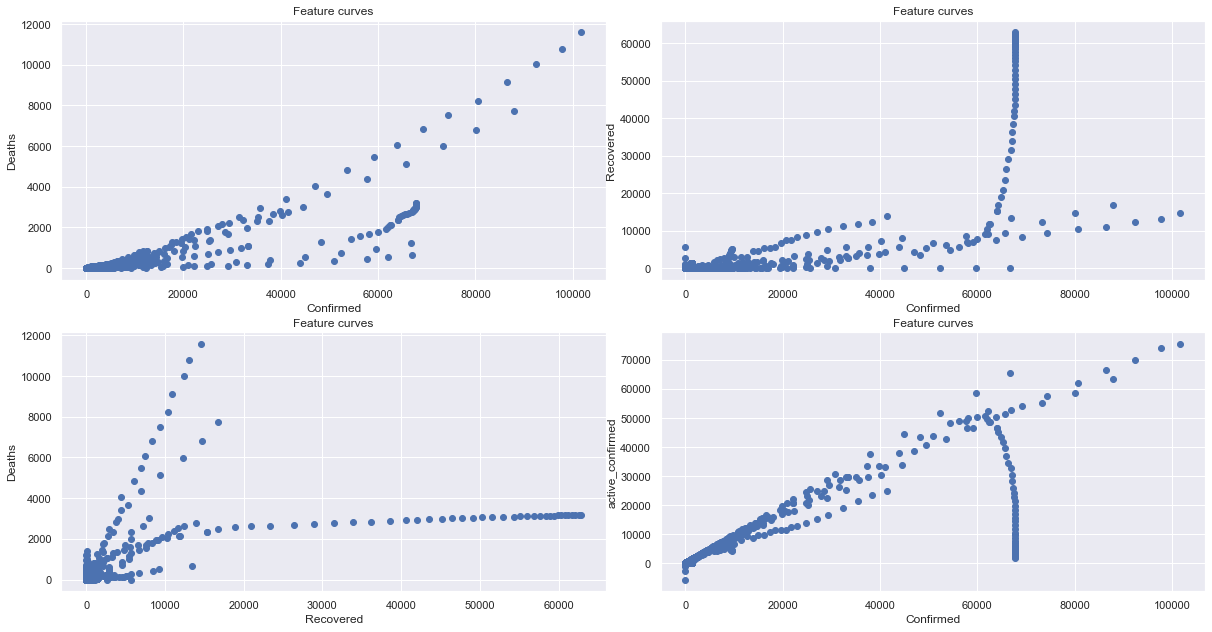

In [24]:

import seaborn as sns 
import statsmodels as sm

fig = plt.figure(figsize=(20.5,10.5))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    col = features[i-1]
    val = values[i-1]
    ax.scatter(val[0], val[1])
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.set_title('Feature curves')
plt.show()

In [25]:
start_date = impute_covid.Date.min()
end_date = impute_covid.Date.max()
print('Novel Covid-19 information:\n 1. Start date = {}\n 2. End date = {}'.format(start_date, end_date))

Novel Covid-19 information:
 1. Start date = 2020-01-22 00:00:00
 2. End date = 2020-03-30 00:00:00


In [26]:
worldwide = impute_covid[impute_covid['Date'] == end_date]

In [27]:
nb_country = len(worldwide['Country'].value_counts()) # number country
worldwide['Country'].value_counts()

US                          59
Mainland China              31
Canada                      15
UK                          10
France                      10
Australia                    8
Netherlands                  4
Denmark                      3
Namibia                      1
Poland                       1
Dominica                     1
Bosnia and Herzegovina       1
Rwanda                       1
San Marino                   1
Niger                        1
Jordan                       1
Holy See                     1
Malaysia                     1
Ethiopia                     1
Mauritius                    1
Senegal                      1
West Bank and Gaza           1
Panama                       1
Somalia                      1
Seychelles                   1
Belize                       1
Mongolia                     1
Eswatini                     1
Iceland                      1
Lithuania                    1
                            ..
Zambia                       1
Central 

In [28]:
world = worldwide.groupby('Country').sum()
world = world.sort_values(by=['Confirmed'], ascending=False)
world.head()

,Confirmed,Deaths,Recovered,active_confirmed
Country,,,,
US,161807,2978,5644,153185
Italy,101739,11591,14620,75528
Spain,87956,7716,16780,63460
Mainland China,81478,3304,75790,2384
Germany,66885,645,13500,52740


# REPORT TILL 30 MARCH 

In [29]:
print('================ Worldwide report ===============================')
print('== Information to {} on novel COVID-19 =========\n'.format(end_date))
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n\
Total country Recorded: {} \n'.format(\
worldwide.Confirmed.sum(), worldwide.Deaths.sum(), worldwide.Recovered.sum(), worldwide.active_confirmed.sum(),\
                                     nb_country))
print('==================================================================')

================ Worldwide report ===============================
== Information to 2020-03-30 00:00:00 on novel COVID-19 =========

Tota confirmed: 782365
Total Deaths: 37582
Total Recovered: 164566
Total active confirmed: 580217
Total country Recorded: 180 



# TOTAL CASES

Text(0, 0.5, 'Total Cases')

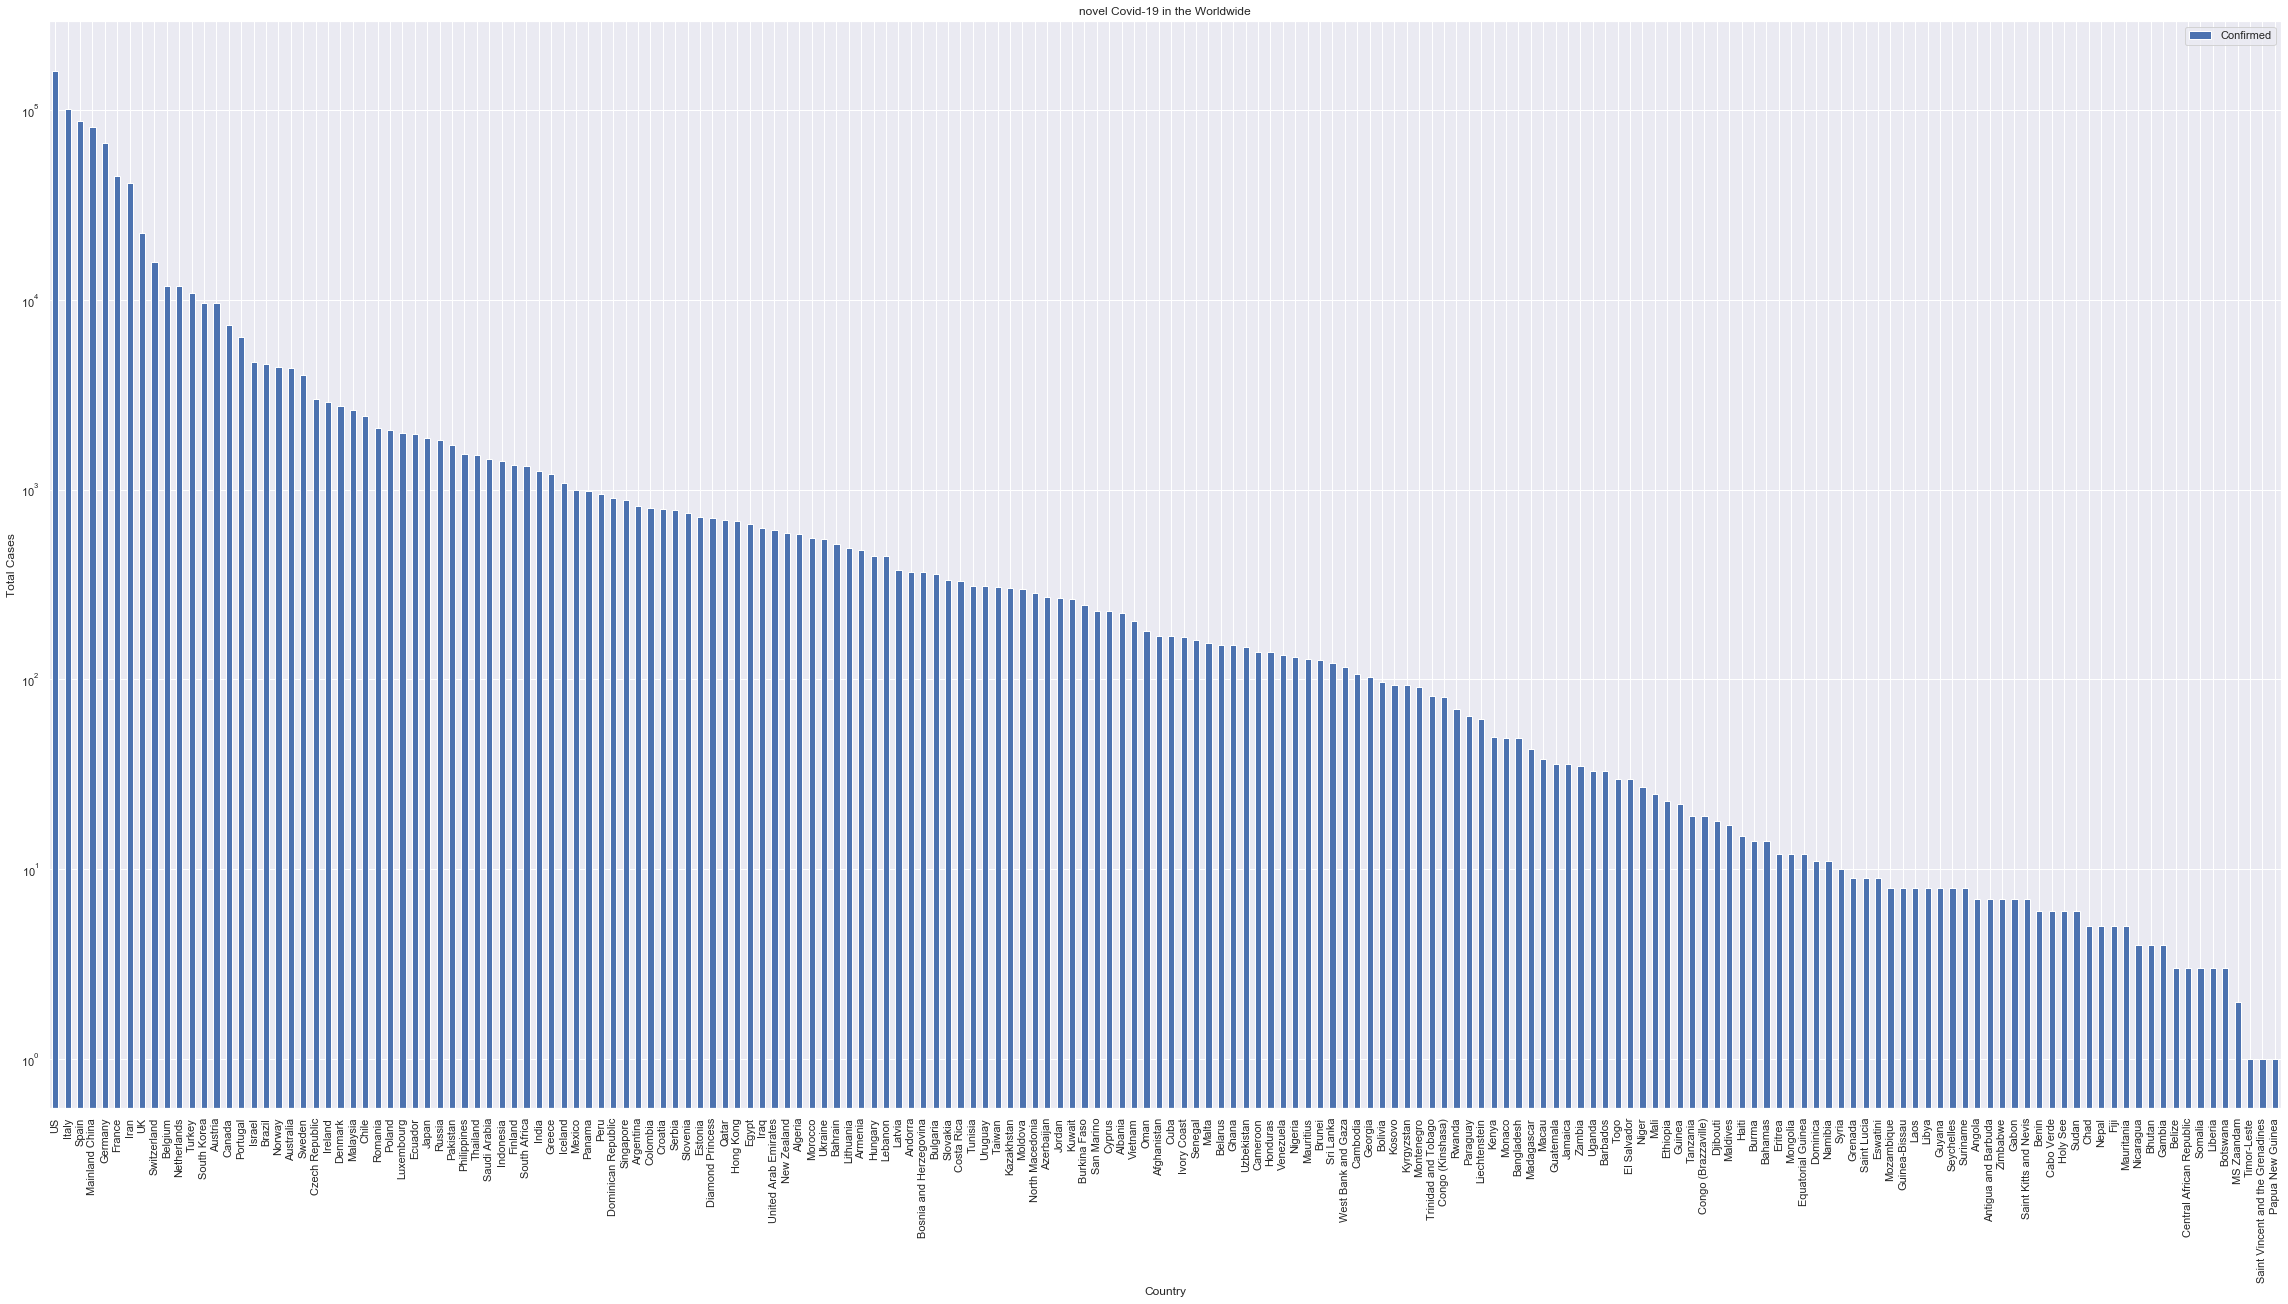

In [32]:
world.Confirmed.plot(kind='bar', title= 'novel Covid-19 in the Worldwide', figsize=(40,20), logy=True,legend=True)
plt.ylabel('Total Cases')

# TOTAL RECOVERED

Text(0, 0.5, 'Total Recovered')

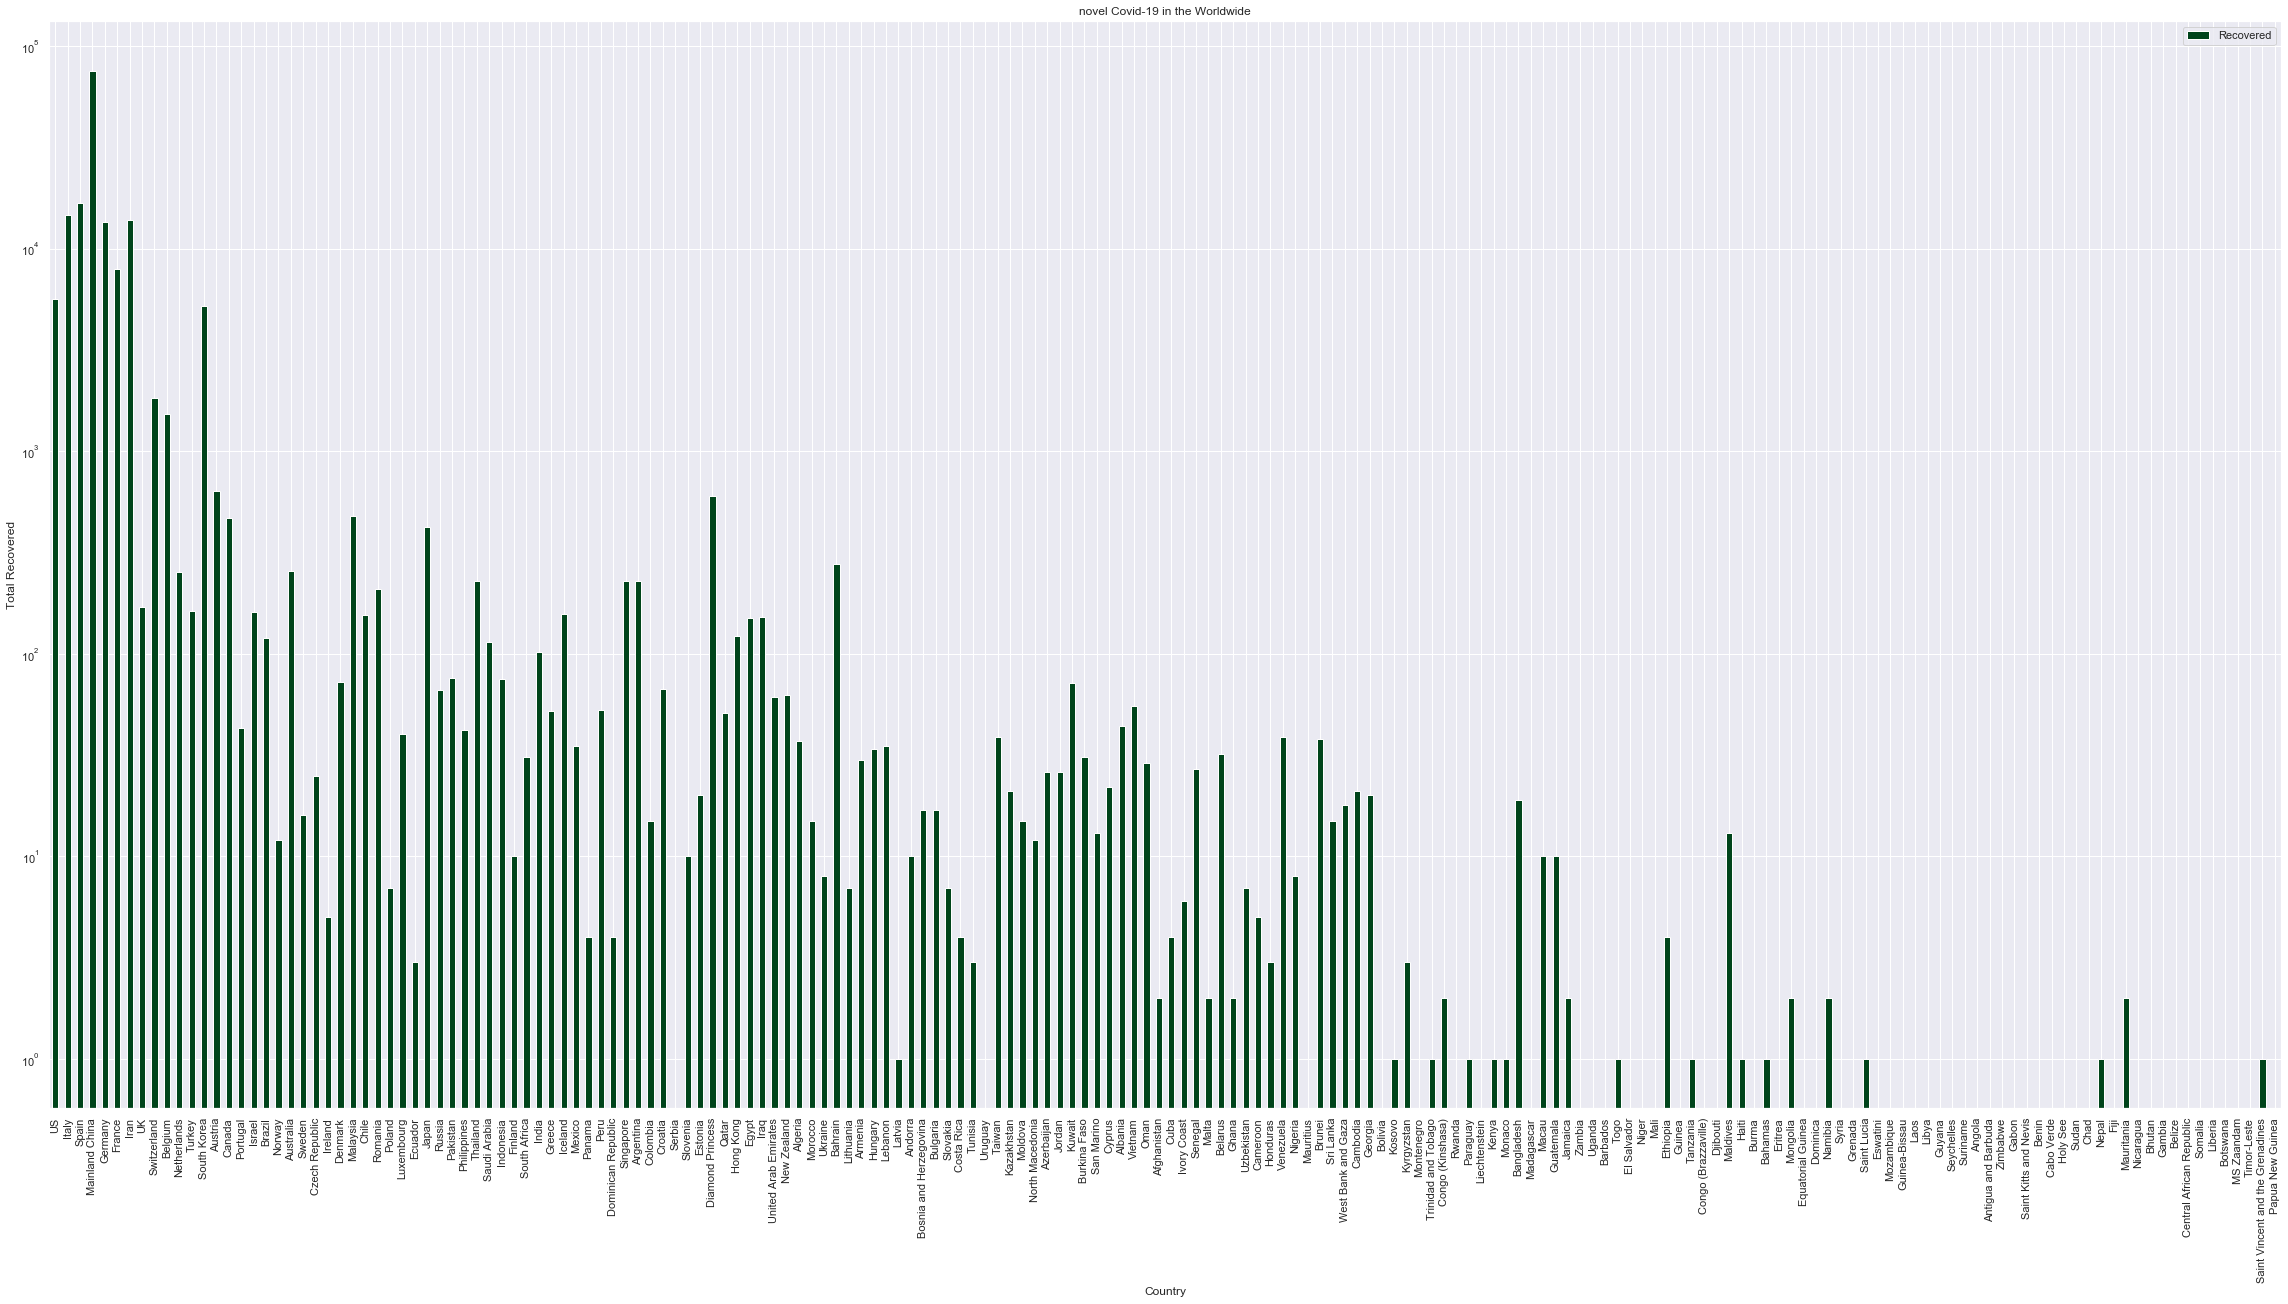

In [33]:
world.Recovered.plot(kind='bar', title= 'novel Covid-19 in the Worldwide', figsize=(40,20), logy=True,\
                     colormap='Greens_r', legend=True)
plt.ylabel('Total Recovered')

# TOTAL DEATHS

Text(0, 0.5, 'Total Deaths')

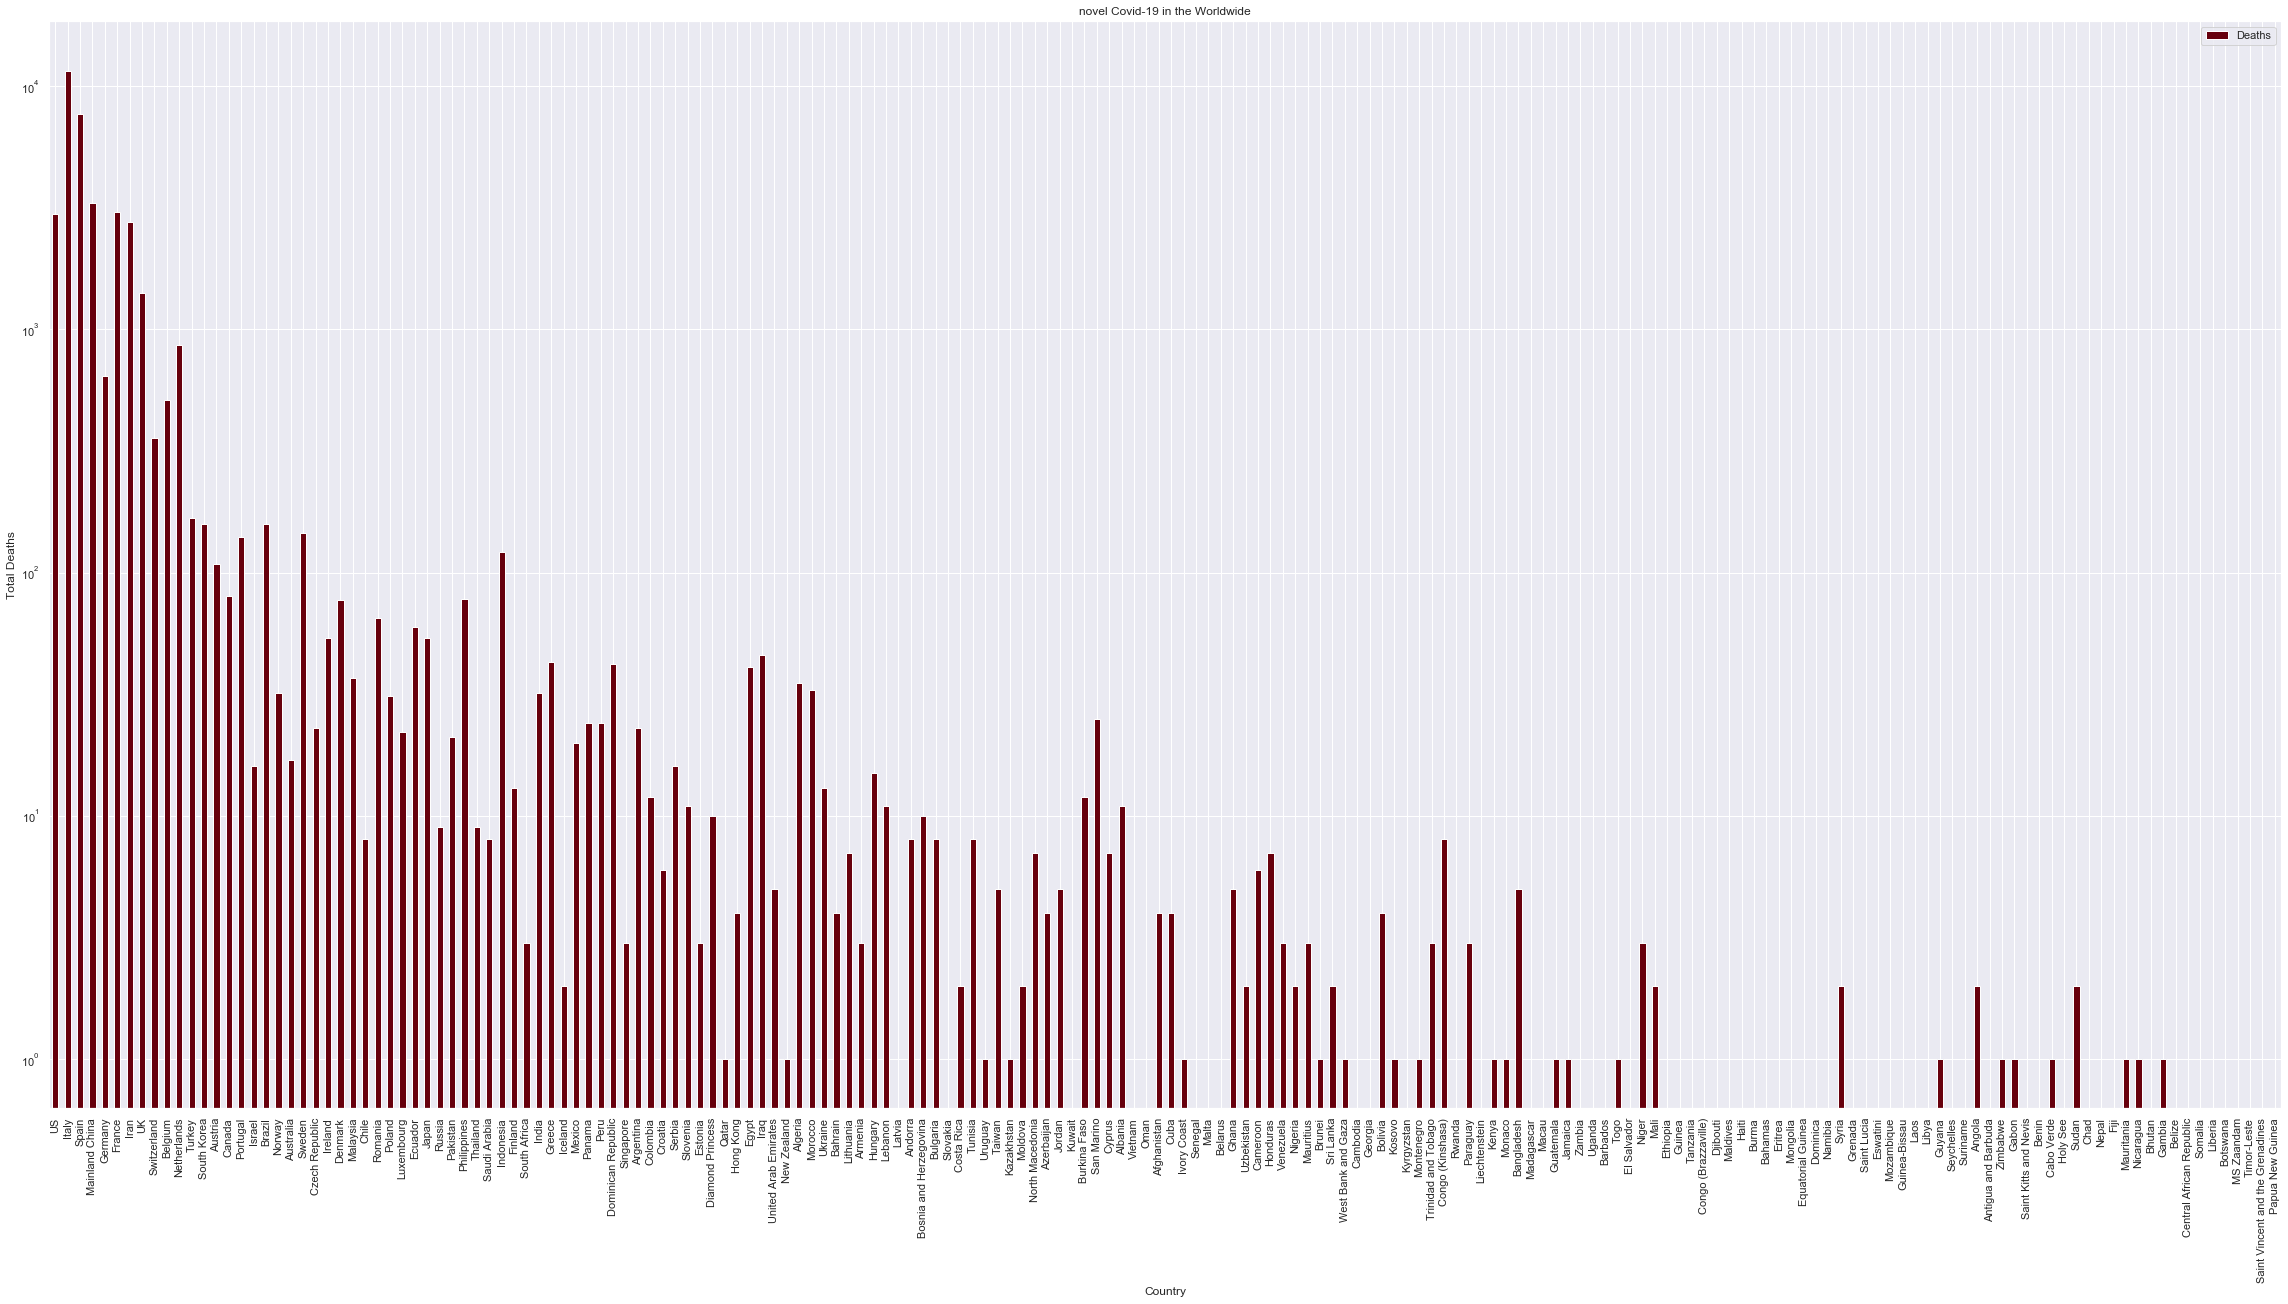

In [34]:
world.Deaths.plot(kind='bar', title= 'novel Covid-19 in the Worldwide', figsize=(40,20), logy=True,\
                     colormap='Reds_r', legend=True)
plt.ylabel('Total Deaths')

# TOTAL ACTIVE CASES

Text(0, 0.5, 'Total  Active Cases')

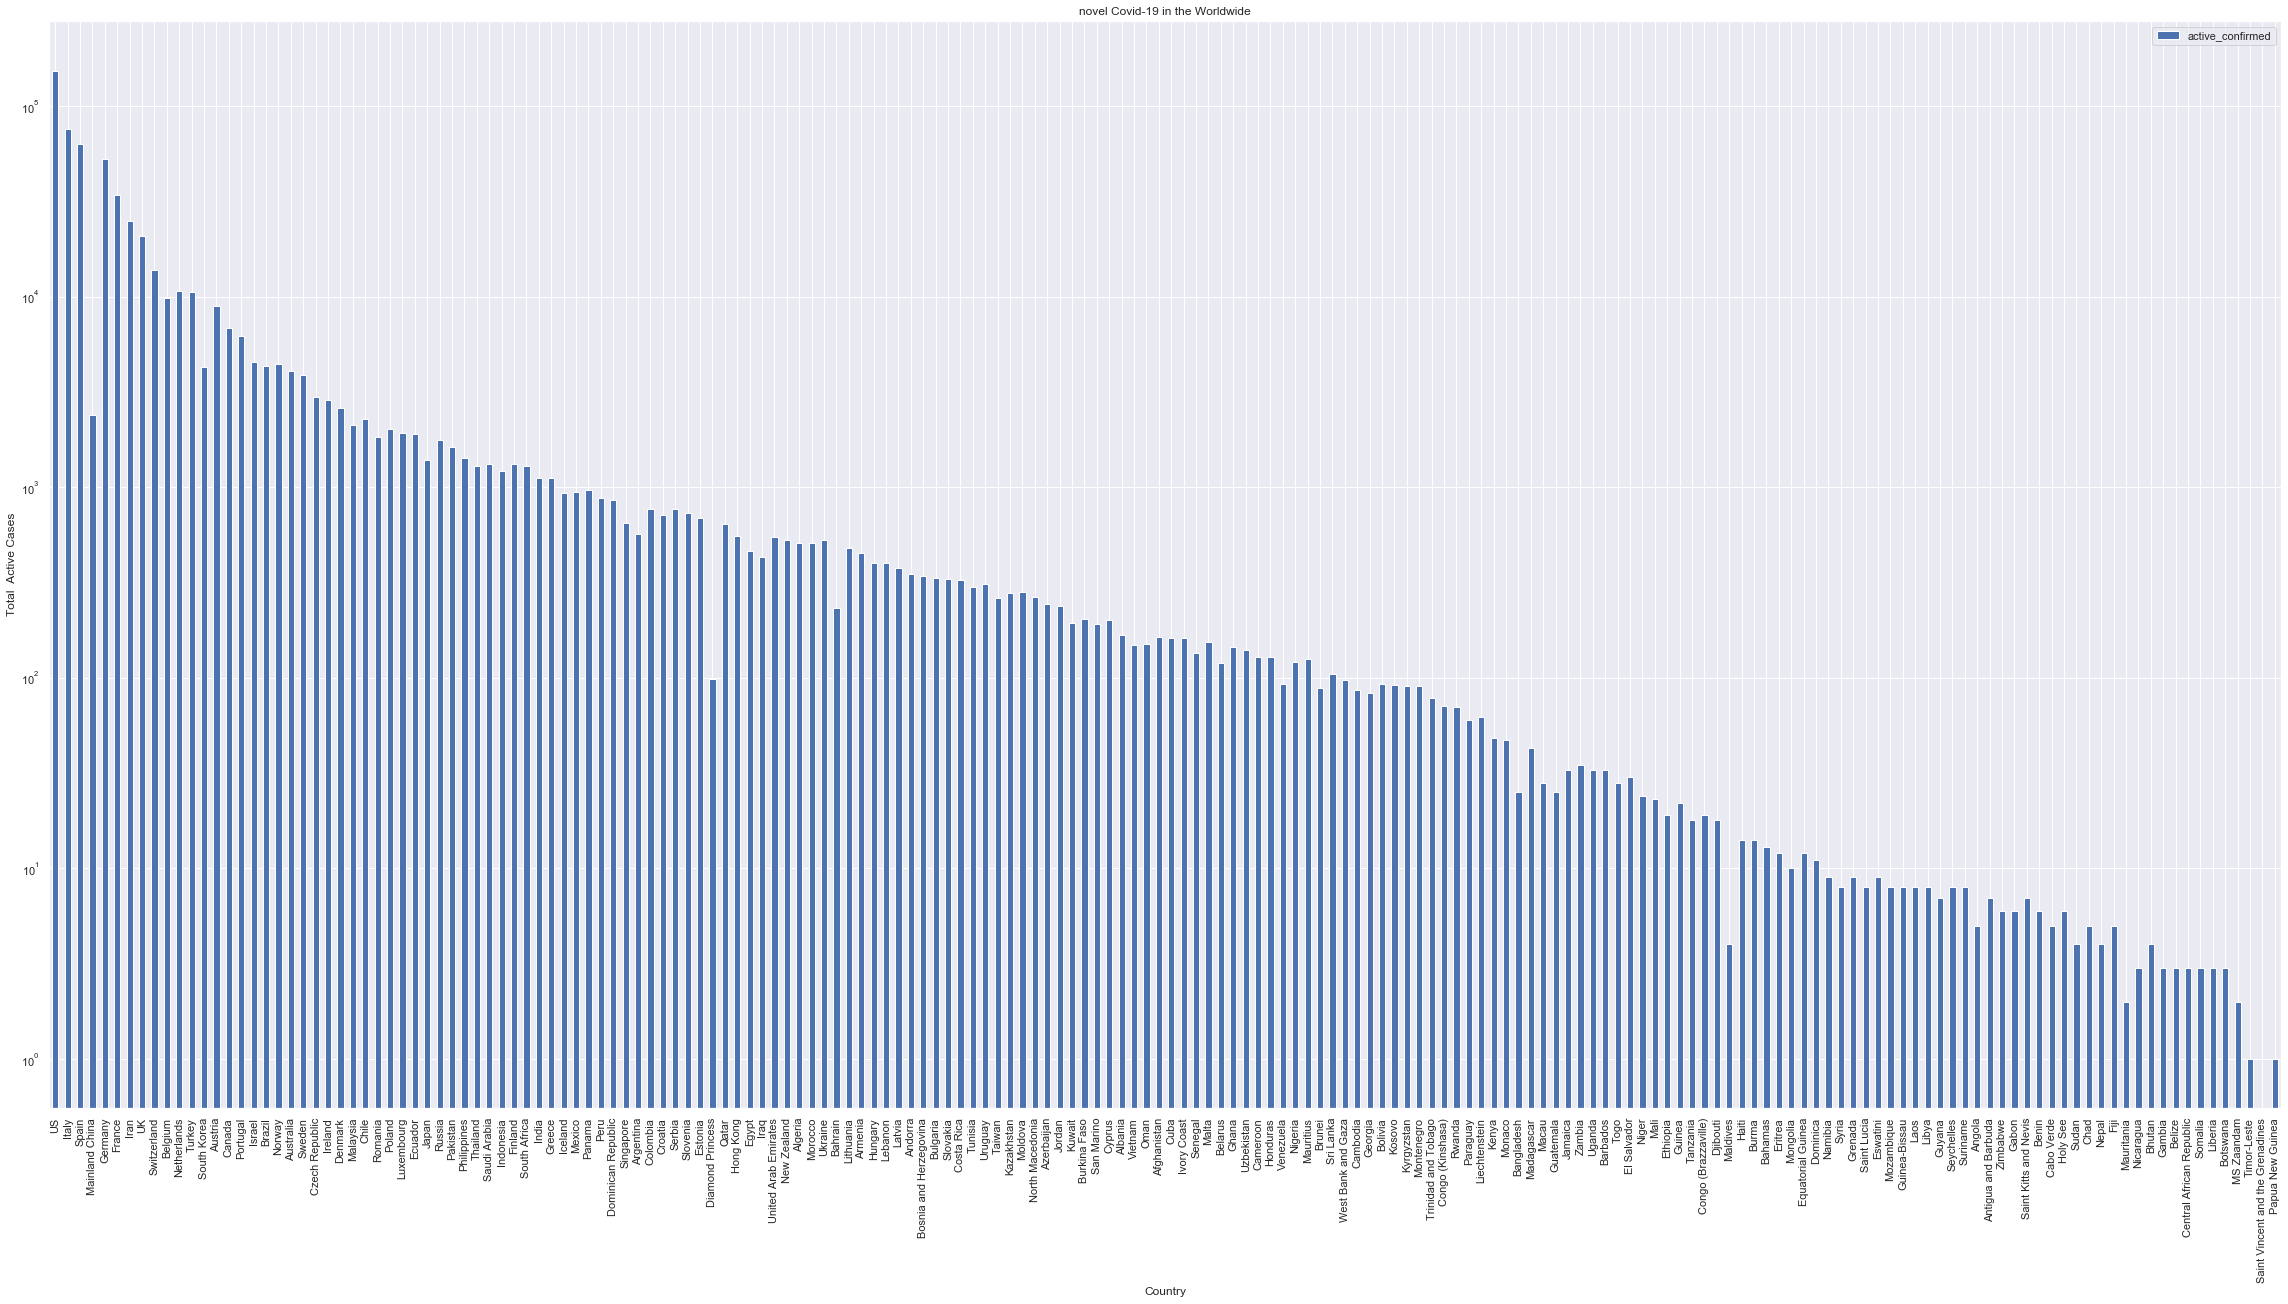

In [35]:
world.active_confirmed.plot(kind='bar', title= 'novel Covid-19 in the Worldwide', figsize=(40,20), logy=True,\
                            legend=True)
plt.ylabel('Total  Active Cases')

In [36]:
world_table = world.reset_index()


In [37]:
x = world_table[world_table['Country'] == 'France']
big_7 = world_table[world_table['Confirmed'] >= x.iloc[0,1]]

In [38]:
big_7.style.background_gradient(cmap='viridis')

,Country,Confirmed,Deaths,Recovered,active_confirmed
0,US,161807,2978,5644,153185
1,Italy,101739,11591,14620,75528
2,Spain,87956,7716,16780,63460
3,Mainland China,81478,3304,75790,2384
4,Germany,66885,645,13500,52740
5,France,45170,3030,7964,34176


# MOST AFFECTED COUNTRY

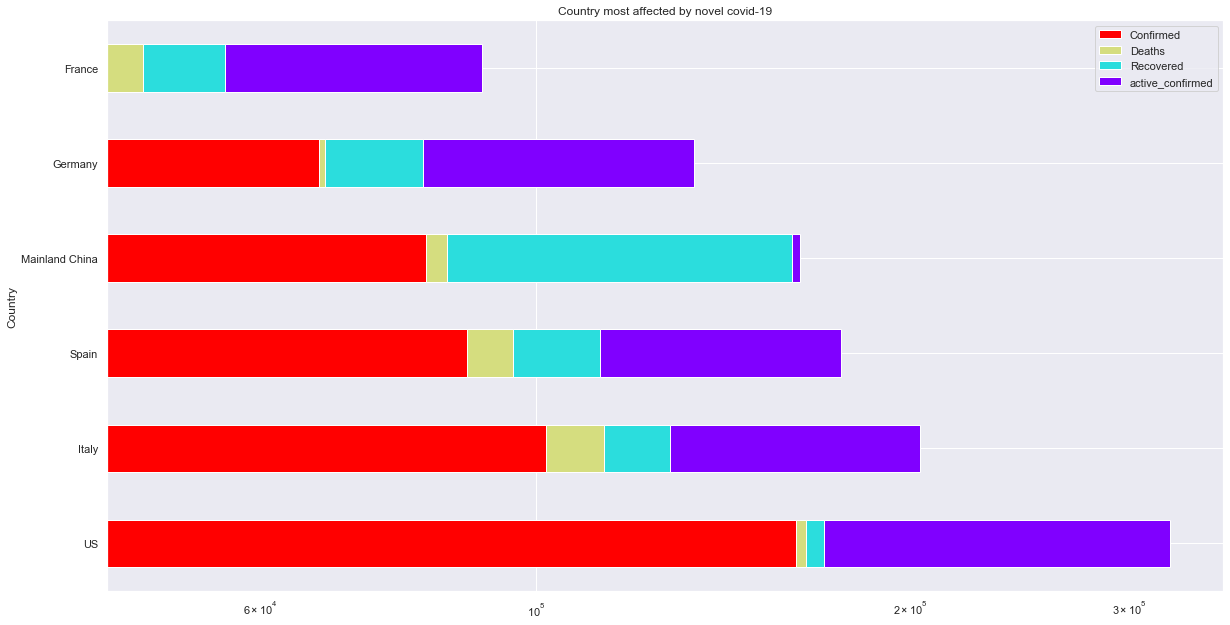

In [40]:
axs = big_7.plot('Country', ['Confirmed', 'Deaths', 'Recovered', 'active_confirmed'], kind='barh',\
                 stacked=True, title='Country most affected by novel covid-19',\
                 figsize=(20,10.5),colormap='rainbow_r', logx=True, legend=True) 


# TOTAL CASES DAYWISE

In [41]:
time_obs = impute_covid.groupby('Date')['Confirmed'].aggregate([np.sum])
time_obs.columns = ['Confirmed']

Text(0, 0.5, 'Total Confirmed observation')

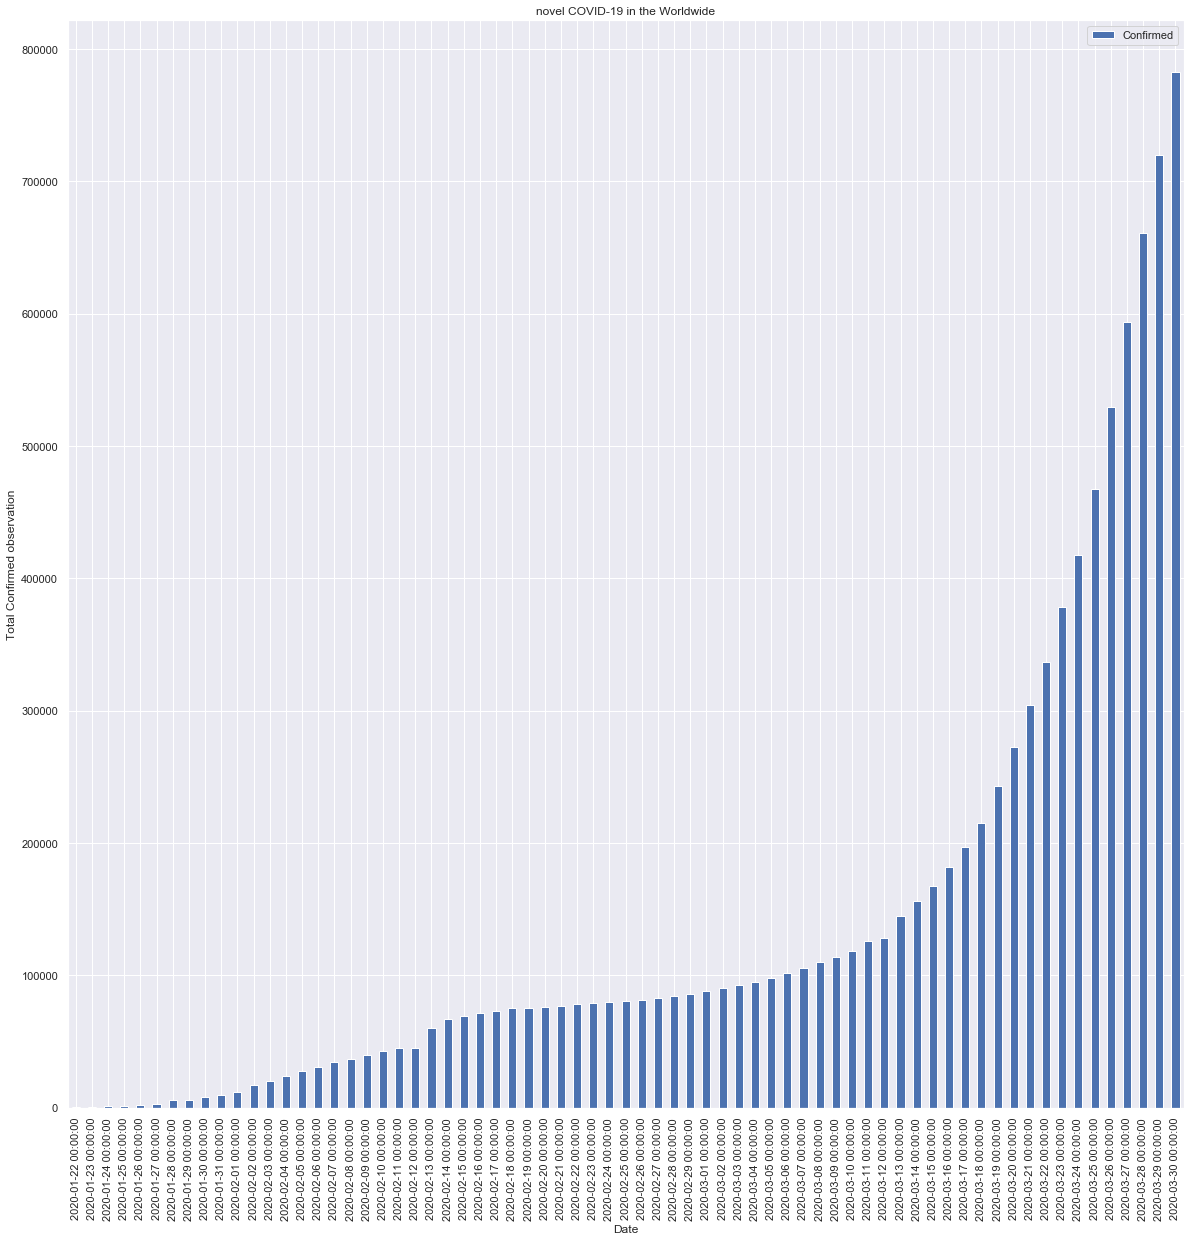

In [43]:
time_obs.plot(figsize=(20,20), title='novel COVID-19 in the Worldwide', kind='bar')
plt.ylabel('Total Confirmed observation')

# us special case

In [48]:
us = impute_covid[impute_covid['Country'] == 'US']

In [49]:
chstar_date = us.Date.min()
chend_date = us.Date.max()

In [50]:
lastus = us[us['Date'] == chend_date]
lastus.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,active_confirmed
10220,10221,2020-03-30,Alabama,US,2020-03-30 22:58:00,899,10,0,889
10221,10222,2020-03-30,Alaska,US,2020-03-30 22:58:00,114,3,0,111
10223,10224,2020-03-30,American Samoa,US,2020-03-30 22:58:00,0,0,0,0
10226,10227,2020-03-30,Arizona,US,2020-03-30 22:58:00,1157,20,0,1137
10227,10228,2020-03-30,Arkansas,US,2020-03-30 22:58:00,473,7,0,466


# US report

In [51]:
print('================ US report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(chend_date))
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastus.Confirmed.sum(), lastus.Deaths.sum(), lastus.Recovered.sum(), lastus.active_confirmed.sum()))
print('==================================================================')

================ US report ===================================
== Information to 2020-03-30 00:00:00 on novel COVID-19 =========

Tota confirmed: 161807
Total Deaths: 2978
Total Recovered: 5644
Total active confirmed: 153185



# US Statewise report

In [52]:
lastus[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
10220,Alabama,899,10,0,889
10221,Alaska,114,3,0,111
10223,American Samoa,0,0,0,0
10226,Arizona,1157,20,0,1137
10227,Arkansas,473,7,0,466
10234,California,7138,146,0,6992
10238,Colorado,2311,47,0,2264
10239,Connecticut,2571,36,0,2535
10241,Delaware,264,6,0,258
10243,Diamond Princess cruise ship,49,0,0,49


In [53]:
province = lastus.groupby('Province/State').sum()
province = province.sort_values(by=['Confirmed'], ascending=False)

Text(0, 0.5, 'Total patient')

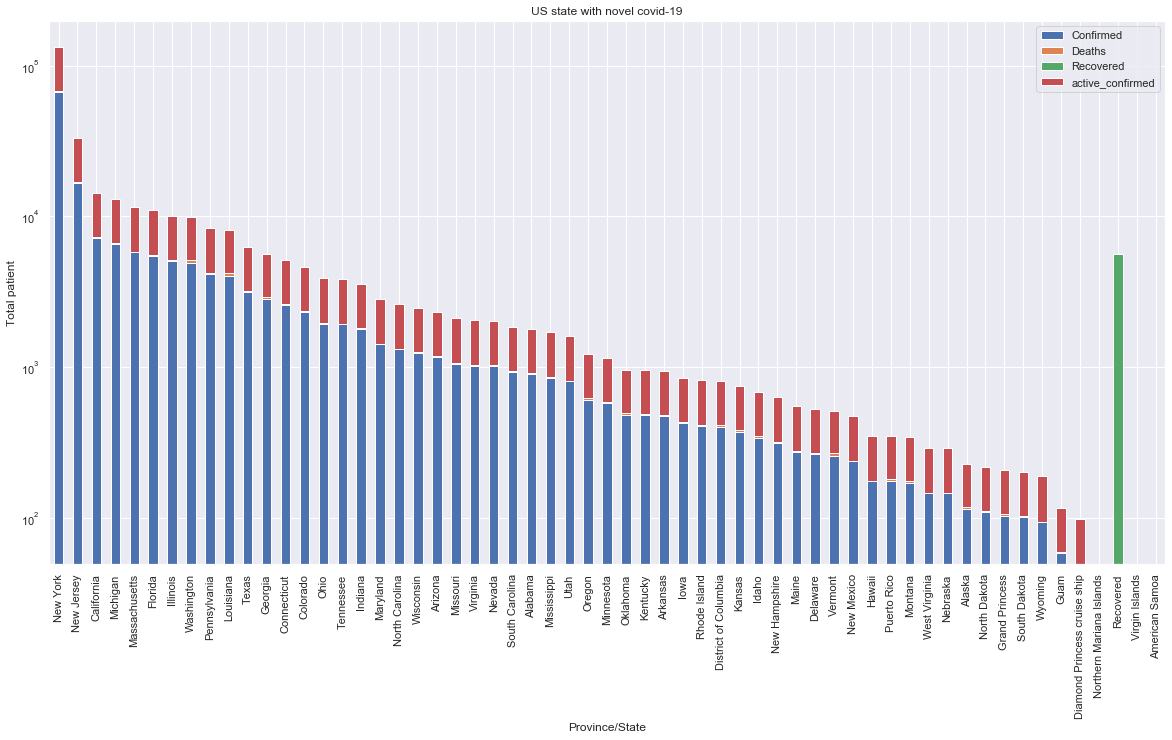

In [54]:
province.plot(kind='bar', label='Confirmed',logy=True,figsize=(20,10), stacked=True,\
              title='US state with novel covid-19')
plt.ylabel('Total patient')

# confirmed in US daywise

In [55]:
conf_us = us.groupby('Date')['Confirmed'].agg('sum')
rec_us = us.groupby('Date')['Recovered'].agg('sum')
dea_us = us.groupby('Date')['Deaths'].agg('sum')
ac_us = us.groupby('Date')['active_confirmed'].agg('sum')

Text(0, 0.5, 'Total patient')

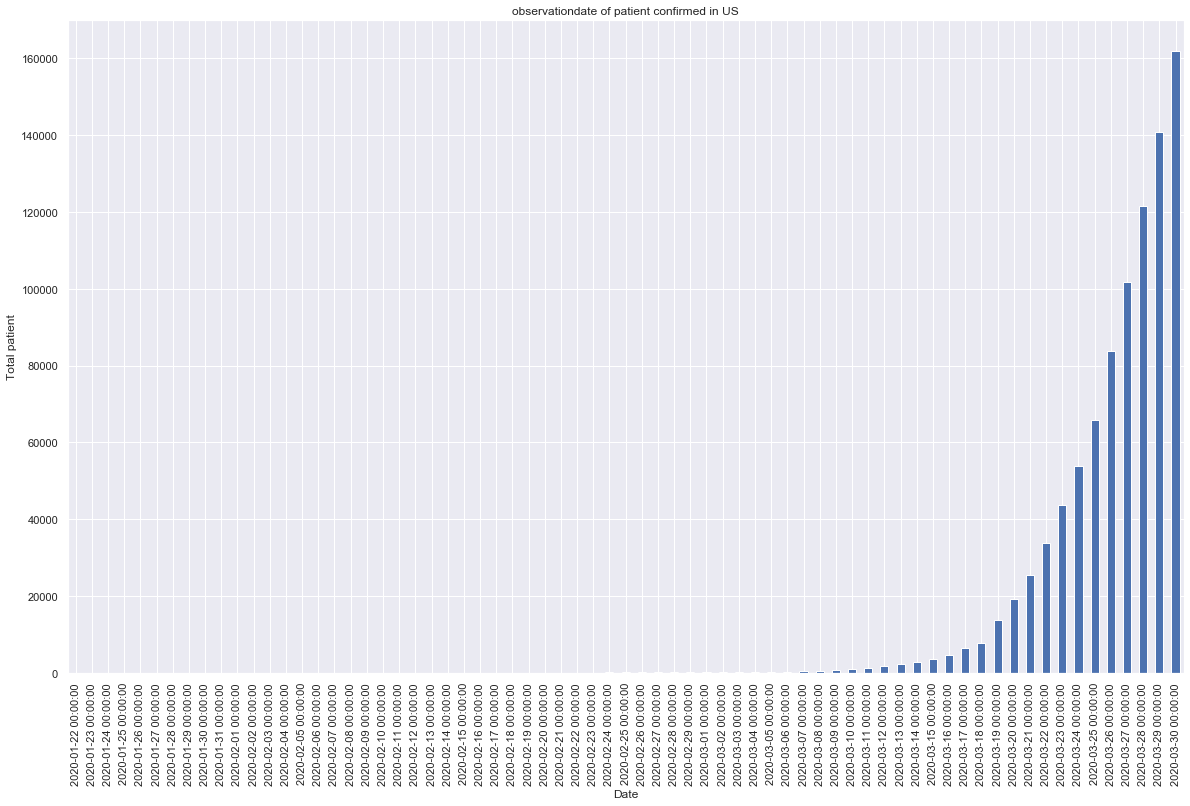

In [56]:
conf_us.plot(figsize=(20,12), kind='bar',title='observationdate of patient confirmed in US')
plt.ylabel('Total patient')

# rest of world

In [57]:
rest_world = impute_covid[impute_covid['Country'] != 'US']

In [58]:
rest_world.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,active_confirmed
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0,0


In [59]:
row = rest_world[rest_world['Date'] == rest_world.Date.max()]

In [60]:
print('================ ROW report =====================================')
print('== Information to {} on novel COVID-19 =========\n'.format(chend_date))
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
row.Confirmed.sum(), row.Deaths.sum(), row.Recovered.sum(), row.active_confirmed.sum()))
print('==================================================================')

================ ROW report =====================================
== Information to 2020-03-30 00:00:00 on novel COVID-19 =========

Tota confirmed: 620558
Total Deaths: 34604
Total Recovered: 158922
Total active confirmed: 427032



In [61]:
rw = row[['Country', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].\
groupby('Country').sum()
rwx = rw.sort_values(by=['Confirmed'], ascending=False)
rwx.style.background_gradient(cmap='viridis')

,Confirmed,Deaths,Recovered,active_confirmed
Country,,,,
Italy,101739,11591,14620,75528
Spain,87956,7716,16780,63460
Mainland China,81478,3304,75790,2384
Germany,66885,645,13500,52740
France,45170,3030,7964,34176
Iran,41495,2757,13911,24827
UK,22453,1411,171,20871
Switzerland,15922,359,1823,13740
Belgium,11899,513,1527,9859
